# Import libraries and python scripts

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import neighbors, tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import feature_selection
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# ----------------------------------------- Import Dataset -----------------------------------------------

In [2]:
nhanes_data = pd.read_csv("C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\NHANES_CombinedProjectDataset.csv", delimiter=",", index_col=0, header=0)

In [3]:
num_rows = nhanes_data.shape[0] + 1
num_cols = nhanes_data.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

In [4]:
nhanes_data.shape

(10175, 44)

In [5]:
print nhanes_data.head()

       RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC2  DMDMARTL  INDHHIN2  INDFMPIR  \
SEQN                                                                          
73557         1        69         4       3.0       4.0       4.0      0.84   
73558         1        54         3       3.0       1.0       7.0      1.78   
73559         1        72         3       4.0       1.0      10.0      4.51   
73560         1         9         3       NaN       NaN       9.0      2.52   
73561         2        73         3       5.0       1.0      15.0      5.00   

       BPQ020  CBD070  CBD090  CBD120  CBD130  DIQ010  DBD895  DBD900  DBD905  \
SEQN                                                                            
73557     1.0   300.0     0.0     0.0    85.0     1.0     8.0     8.0     0.0   
73558     1.0   642.0   214.0    40.0    20.0     1.0     0.0     NaN     0.0   
73559     1.0   150.0    25.0    40.0     0.0     1.0     1.0     0.0     0.0   
73560     NaN   400.0     0.0    50.0    

# ---------------------- Remove all Refused and Don't Know Answers ----------------------

# Remove all entries where the person refused to answer or answered don't know

Create array of refused values (each entry corresponds to each variable of the nhanes_data dataframe).

In [6]:
features = np.array(nhanes_data.columns.values.tolist())

refused_ndx = [0, 0, 0, 7, 77, 77, 0, 7, 777777, 777777, 777777, 777777, 7, 7777, 7777, 7777, 7777, 7, 7, 7, 7777, 7, 7777, 7777, 7, 7, 77, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
refused_arr = np.zeros((1, len(refused_ndx)))
refused_arr[0] = refused_ndx

refused_df = pd.DataFrame(refused_arr)
refused_df.columns = features
print refused_df.shape
print refused_df

(1, 44)
   RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC2  DMDMARTL  INDHHIN2  INDFMPIR  \
0       0.0       0.0       0.0       7.0      77.0      77.0       0.0   

   BPQ020    CBD070    CBD090    CBD120    CBD130  DIQ010  DBD895  DBD900  \
0     7.0  777777.0  777777.0  777777.0  777777.0     7.0  7777.0  7777.0   

   DBD905  DBD910  MCQ080  MCQ365A  MCQ365B  PAD680  SMQ020  WHD010  WHD020  \
0  7777.0  7777.0     7.0      7.0      7.0  7777.0     7.0  7777.0  7777.0   

   HEQ010  HEQ030  HUQ051  HUQ071  MCQ010  MCQ082  MCQ086  MCQ160N  MCQ160B  \
0     7.0     7.0    77.0     7.0     7.0     7.0     7.0      7.0      7.0   

   MCQ160C  MCQ160D  MCQ160E  MCQ160F  MCQ160G  MCQ160M  MCQ160K  MCQ160L  \
0      7.0      7.0      7.0      7.0      7.0      7.0      7.0      7.0   

   MCQ160O  MCQ203  MCQ220  
0      7.0     7.0     7.0  


Create array of don't know values (each entry corresponds to each variable of the nhanes_data dataframe).

In [7]:
dk_ndx = [0, 0, 0, 9, 99, 99, 0, 9, 999999, 999999, 999999, 999999, 9, 9999, 9999, 9999, 9999, 9, 9, 9, 9999, 9, 9999, 9999, 9, 9, 99, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
dk_arr = np.zeros((1, len(dk_ndx)))
dk_arr[0] = dk_ndx

dk_df = pd.DataFrame(dk_arr)
dk_df.columns = features
print dk_df.shape
print dk_df

(1, 44)
   RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC2  DMDMARTL  INDHHIN2  INDFMPIR  \
0       0.0       0.0       0.0       9.0      99.0      99.0       0.0   

   BPQ020    CBD070    CBD090    CBD120    CBD130  DIQ010  DBD895  DBD900  \
0     9.0  999999.0  999999.0  999999.0  999999.0     9.0  9999.0  9999.0   

   DBD905  DBD910  MCQ080  MCQ365A  MCQ365B  PAD680  SMQ020  WHD010  WHD020  \
0  9999.0  9999.0     9.0      9.0      9.0  9999.0     9.0  9999.0  9999.0   

   HEQ010  HEQ030  HUQ051  HUQ071  MCQ010  MCQ082  MCQ086  MCQ160N  MCQ160B  \
0     9.0     9.0    99.0     9.0     9.0     9.0     9.0      9.0      9.0   

   MCQ160C  MCQ160D  MCQ160E  MCQ160F  MCQ160G  MCQ160M  MCQ160K  MCQ160L  \
0      9.0      9.0      9.0      9.0      9.0      9.0      9.0      9.0   

   MCQ160O  MCQ203  MCQ220  
0      9.0     9.0     9.0  


Loop over the variables and find the refused and don't know entries.  Remove any matches found.

In [8]:
for i in range(len(features)):
    ref_ndx = nhanes_data[features[i]] == float(refused_df[features[i]])
    nhanes_data = nhanes_data[~ref_ndx]

    dk_ndx = nhanes_data[features[i]] == float(dk_df[features[i]])
    nhanes_data = nhanes_data[~dk_ndx]

print nhanes_data.shape

(8841, 44)


# --------------------------- Create Initial Exploratory Plots ---------------------------------------

# Create exploratory plots of all variables and save to folder

The code below creates bar plots for all categorical variables and histograms for all continuous variables.  It automatically saves off the plots to a folder specified so I could review them without cluttering up the notebook.

In [9]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data[features[i]].value_counts().plot(kind='bar')
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
    else:
        temp_ndx = nhanes_data[features[i]].isnull()
        temp_var = nhanes_data[features[i]][~temp_ndx]
        
        plt.hist(temp_var, bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
        plt.grid(True)        
    
    figPath = 'C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Exploratory\\Initial Plots\\' + features[i] + '.png'
    plt.savefig(figPath)
    plt.close()

# -------------------- Remove 5555 Entries From DBD895 and DBD900 --------------------

Reviewing the histograms created above showed that two variables contained 5555 values.  This corresponds to 'Over 21'.  Since this is value is categorical but the rest of the values of these variables were continuous, and because there were only a couple entries, the 5555 values were deleted.

<function matplotlib.pyplot.show>

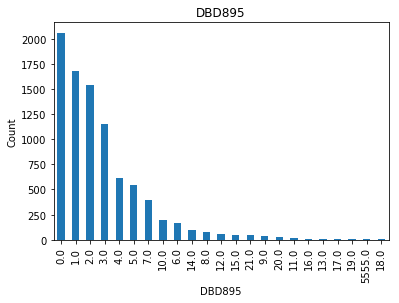

In [10]:
nhanes_data['DBD895'].value_counts().plot(kind='bar')
plt.xlabel('DBD895')
plt.ylabel('Count')
plt.title('DBD895')
plt.show


<function matplotlib.pyplot.show>

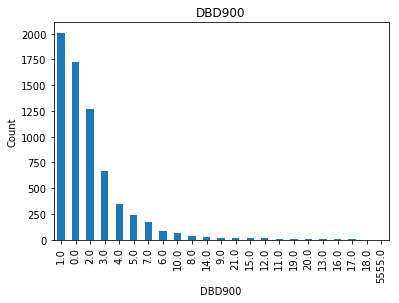

In [11]:
nhanes_data['DBD900'].value_counts().plot(kind='bar')
plt.xlabel('DBD900')
plt.ylabel('Count')
plt.title('DBD900')
plt.show


Removal of 5555 entries.

In [12]:
temp_ndx = nhanes_data['DBD895'] == 5555
print temp_ndx.sum()
nhanes_data = nhanes_data[~temp_ndx]

temp_ndx = nhanes_data['DBD900'] == 5555
print temp_ndx.sum()
nhanes_data = nhanes_data[~temp_ndx]


5
0


# ------------------- Set Column Types to Match Dataset Types ------------------------------

Variable data types assigned in the read_csv function were not correct for any of the categorical variables.  The data types of all of these variables needs to be category, not float64 or int (what was assigned).

In [13]:
nhanes_data.dtypes

RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDEDUC2    float64
DMDMARTL    float64
INDHHIN2    float64
INDFMPIR    float64
BPQ020      float64
CBD070      float64
CBD090      float64
CBD120      float64
CBD130      float64
DIQ010      float64
DBD895      float64
DBD900      float64
DBD905      float64
DBD910      float64
MCQ080      float64
MCQ365A     float64
MCQ365B     float64
PAD680      float64
SMQ020      float64
WHD010      float64
WHD020      float64
HEQ010      float64
HEQ030      float64
HUQ051        int64
HUQ071        int64
MCQ010      float64
MCQ082      float64
MCQ086      float64
MCQ160N     float64
MCQ160B     float64
MCQ160C     float64
MCQ160D     float64
MCQ160E     float64
MCQ160F     float64
MCQ160G     float64
MCQ160M     float64
MCQ160K     float64
MCQ160L     float64
MCQ160O     float64
MCQ203      float64
MCQ220      float64
dtype: object

Create a list of the variable names that are categorical, then loop over them, changing their data type.

In [14]:
cat_attrs = ['RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'DMDMARTL', 'INDHHIN2', 'BPQ020', 'DIQ010', 'MCQ080', 'MCQ365A', 'MCQ365B', 'SMQ020', 'HEQ010', 'HEQ030', 'HUQ051', 'HUQ071', 'MCQ010', 'MCQ082', 'MCQ086', 'MCQ160N', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 'MCQ160M', 'MCQ160K', 'MCQ160L', 'MCQ160O', 'MCQ203', 'MCQ220']

for i in range(len(cat_attrs)):
    nhanes_data[cat_attrs[i]] = nhanes_data[cat_attrs[i]].astype('category')


# ------------------------------------ Remove NaN Values ---------------------------------------------

# Find all null values and replace with mean if numeric or drop rows if categorical

In [15]:
nhanes_data.isnull().sum().sum()

84813

Remove all rows that contain nulls in any categorical variables because there is no way to replace these values with a mean or something similar (arithmetic operations don't apply to categorical variables).

In [16]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data.drop(nhanes_data[nhanes_data[features[i]].isnull()].index, axis=0, inplace=True)

In [17]:
nhanes_data.shape

(5055, 44)

In [18]:
nhanes_data.isnull().sum().sum()

1358

Find all the variables that still have null values present.

In [19]:
null_cnt = nhanes_data.isnull().sum()
null_ndx = null_cnt > 0
print null_cnt[null_ndx]

INDFMPIR     157
CBD070         4
CBD090         5
CBD120         4
CBD130         4
DBD900      1123
DBD905        13
DBD910        10
PAD680         5
WHD010        16
WHD020        17
dtype: int64


Find the percent of rows that are null for the DBD900 attribute.

In [20]:
print 'Percent NaN of DBD900 Attribute:'
print (nhanes_data['DBD900'].isnull().sum() / float(nhanes_data.shape[0])) * 100

Percent NaN of DBD900 Attribute:
22.215628091


Since a significant number of points are null in DBD900 (22%), I decided to just remove these rows instead of replace with a mean.  The reason that I decided to remove them is that I believe there are too many null values present to get an accurate mean (the mean of the data present will only account for 78% of the data - it may not be representative of the value that should be in the missing 22%).  A better way of dealing with this may have been to perform regression with the variables in order to predict the missing 22% (the rows with the 78% present would be training, the rows with the 22% missing would be testing).

In [21]:
nhanes_data.drop(nhanes_data[nhanes_data['DBD900'].isnull()].index, axis=0, inplace=True)

In [22]:
nhanes_data.shape

(3932, 44)

In [23]:
nhanes_data.isnull().sum().sum()

193

Replace all of the nulls in the remaining continuous variables with the mean of the variable.

In [24]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) != 'category':
        nhanes_data[features[i]].fillna(nhanes_data[features[i]].mean(), inplace=True)


In [25]:
nhanes_data.shape

(3932, 44)

In [26]:
nhanes_data.isnull().sum().sum()

0

When the variables were converted to category from float64, the categorical values all contain one point after the decimal.  Since the category values should not have decimal points, I convert them first to integer here then back to category.  This will ensure the categorical variables do not contain decimal places.  This is necessary for indexing by values.

In [27]:
cat_attrs = ['RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'DMDMARTL', 'INDHHIN2', 'BPQ020', 'DIQ010', 'MCQ080', 'MCQ365A', 'MCQ365B', 'SMQ020', 'HEQ010', 'HEQ030', 'HUQ051', 'HUQ071', 'MCQ010', 'MCQ082', 'MCQ086', 'MCQ160N', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 'MCQ160M', 'MCQ160K', 'MCQ160L', 'MCQ160O', 'MCQ203', 'MCQ220']

for i in range(len(cat_attrs)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data[cat_attrs[i]] = nhanes_data[cat_attrs[i]].astype('int')
        nhanes_data[cat_attrs[i]] = nhanes_data[cat_attrs[i]].astype('category')

In [28]:
print nhanes_data.head()

      RIAGENDR  RIDAGEYR RIDRETH1 DMDEDUC2 DMDMARTL INDHHIN2  INDFMPIR BPQ020  \
SEQN                                                                            
73557        1        69        4        3        4        4      0.84      1   
73559        1        72        3        4        1       10      4.51      1   
73562        1        56        1        4        3        9      4.79      1   
73564        2        61        3        5        2       10      5.00      1   
73565        1        42        2        3        1       15      5.00      2   

       CBD070  CBD090  CBD120  CBD130 DIQ010  DBD895  DBD900  DBD905  DBD910  \
SEQN                                                                           
73557   300.0     0.0     0.0    85.0    1.0     8.0     8.0     0.0     4.0   
73559   150.0    25.0    40.0     0.0    1.0     1.0     0.0     0.0     0.0   
73562   150.0    60.0    60.0     0.0    2.0    14.0    14.0     0.0     0.0   
73564   400.0   100.0   200.0   

# -------------- Remove Income Ranges That Overlap Other Ranges ---------------------

Upon analysis of the dataset, I found that the income variable contained several income brackets (specified by values 1 through 10, 14, and 15) as well as two income ranges (under 20K was value 13 and over 20K was 12).  Since these ranges overlap the other brackets, they were removed.  This is because it is not possible to know the exact value of these ranges so they can't be put into the correct bracket.  They will also throw off analysis and modelling because there will be multiple variables expressing the same income values if they were left in.

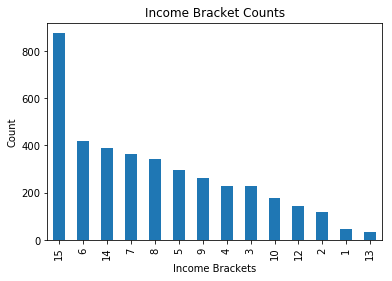

In [29]:
nhanes_data["INDHHIN2"].value_counts().plot(kind='bar')
plt.xlabel('Income Brackets')
plt.ylabel('Count')
plt.title('Income Bracket Counts')

Removal of income range values 12 and 13.

In [30]:
ndx_12 = nhanes_data['INDHHIN2'] == 12
nhanes_data = nhanes_data[~ndx_12]

ndx_13 = nhanes_data['INDHHIN2'] == 13
nhanes_data = nhanes_data[~ndx_13]

nhanes_data.shape

(3754, 44)

# --------------- Set Categorical Variables To Their String Values --------------------------

The categorical values in the dataset all represent actual text strings.  In order to make it easier to interpret the variables after dummy variables are generated, I decided to replace the numeric category value of the variables with their actual string meanings.

In [31]:
for i in range(len(features)):
     if str(nhanes_data[features[i]].dtypes) == 'category':
            
        nhanes_data[features[i]] = nhanes_data[features[i]].astype('int')
        nhanes_data[features[i]] = nhanes_data[features[i]].astype('str')
        
        if features[i] == 'RIAGENDR':            
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Male')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'Female')
            
        elif features[i] == 'RIDRETH1':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Mexican_American')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'Other_Hispanic')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'Non_Hispanic_White')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'Non_Hispanic_Black')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'Other')

        elif features[i] == 'DMDEDUC2':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Less_Than_9th')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'9th_to_12th_No_Grad')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'High_School_Grad_GED')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'Some_College_AA')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'College_Grad_And_Above')

        elif features[i] == 'DMDMARTL':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Married')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'Widowed')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'Divorced')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'Separated')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'Never_Married')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('6' ,'Living_W_Partner')

        elif features[i] == 'INDHHIN2':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'0_to_4999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'5000_to_9999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'10000_to_14999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'15000_to_19999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'20000_to_24999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('6' ,'25000_to_34999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('7' ,'35000_to_44999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('8' ,'45000_to_54999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('9' ,'55000_to_64999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('10' ,'65000_to_74999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('14' ,'75000_to_99999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('15' ,'100000_And_Over')

        elif features[i] == 'DIQ010':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Yes')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'No')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'Borderline')

        elif features[i] == 'HUQ051':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'1')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'2_to_3')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'4_to_5')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'6_to_7')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'8_to_9')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('6' ,'10_to_12')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('7' ,'13_to_15')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('8' ,'16_Or_More')

        else:
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Yes')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'No')
            
        nhanes_data[features[i]] = nhanes_data[features[i]].astype('category')
            

# --------------- Create Classification and Regression Variables ---------------------------

# Create BMI Percentage and Obesity Indicator variables (Obesity Indicator will become the class variable)

The BMI needs to be computed from the weight in kg and height in m.  First these variables had to be converted to the proper units.  Once they were in the correct units, the formula BMI = weight / (height^2) is applied.  

In [32]:
lb_to_kg_const =  0.45359237
ft_to_m_const = 0.3048

nhanes_data['Weight_kg'] = nhanes_data['WHD020'] * lb_to_kg_const
nhanes_data['Height_m'] = nhanes_data['WHD010'] * ft_to_m_const

nhanes_data['BMI_Perc'] = (nhanes_data['Weight_kg'] / (nhanes_data['Height_m']**2)) * 100


Next the obesity indicator needs to be created (this is the class variable that will be used in classification and clustering comparisons). The definition of obesity is having a BMI greater than or equal to 30.

In [33]:
obese_arr = np.zeros(nhanes_data.shape[0])
obese_ndx = nhanes_data['BMI_Perc'] >= 30
obese_arr[obese_ndx] = 1

nhanes_data['Obese_Ind'] = obese_arr
nhanes_data['Obese_Ind'] = nhanes_data['Obese_Ind'].astype('int')
nhanes_data['Obese_Ind'] = nhanes_data['Obese_Ind'].astype('category')

# ----------------------------- Print Descriptive Statistics ------------------------------------------

In [34]:
num_rows = nhanes_data.shape[0] + 1
num_cols = nhanes_data.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

Generate all of the descriptive statistics for the entire dataset.

In [35]:
nhanes_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RIAGENDR,3754,2,Female,1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIDAGEYR,3754,NaN,NaN,NaN,47.3013,17.308,20,33,45,61,80
RIDRETH1,3754,5,Non_Hispanic_White,1730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMDEDUC2,3754,5,Some_College_AA,1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMDMARTL,3754,6,Married,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDHHIN2,3754,12,100000_And_Over,876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDFMPIR,3754,NaN,NaN,NaN,2.7216,1.65501,0.01,1.2,2.46,4.55,5
BPQ020,3754,2,No,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBD070,3754,NaN,NaN,NaN,432.925,314.826,0,200,400,557,4285
CBD090,3754,NaN,NaN,NaN,38.954,71.3283,0,0,0,50,1542


# -------------------------------- Exploratory Plot Creation -----------------------------------------

# Create exploratory plots of variables of interest

Create new bar plots and histograms as was done at the beginning of the data cleaning process and save them off into a new folder.  These plots and histograms will contain the correct category strings, which will make them easier to intepret.  I reviewed all of the plots generated to ensure that all outliers and bad values were properly removed from the data, and also to see what the distributions of each variables are like.

In [36]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data[features[i]].value_counts().plot(kind='bar')
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
    else:
        temp_ndx = nhanes_data[features[i]].isnull()
        temp_var = nhanes_data[features[i]][~temp_ndx]
        
        plt.hist(temp_var, bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
        plt.grid(True)        
    
    figPath = 'C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Exploratory\\Processed Plots\\' + features[i] + '.png'
    plt.savefig(figPath)
    plt.close()

Below are bar plots and histograms of the variables that appeared to be of the most interest in the dataset.

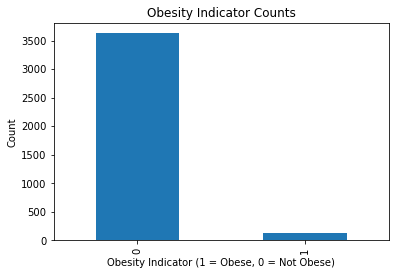

In [37]:
nhanes_data["Obese_Ind"].value_counts().plot(kind='bar')
plt.xlabel('Obesity Indicator (1 = Obese, 0 = Not Obese)')
plt.ylabel('Count')
plt.title('Obesity Indicator Counts')

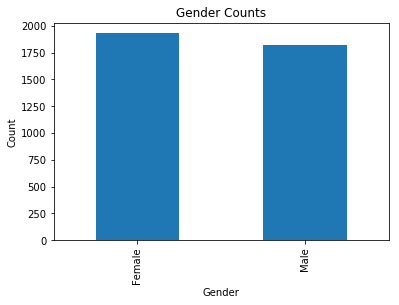

In [38]:
nhanes_data["RIAGENDR"].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Counts')

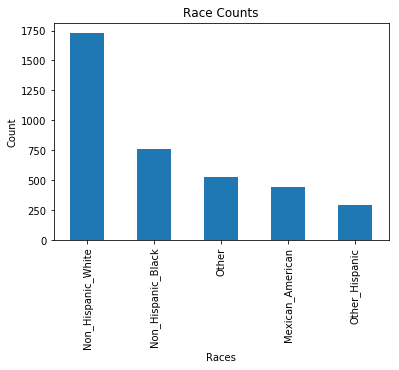

In [39]:
nhanes_data["RIDRETH1"].value_counts().plot(kind='bar')
plt.xlabel('Races')
plt.ylabel('Count')
plt.title('Race Counts')

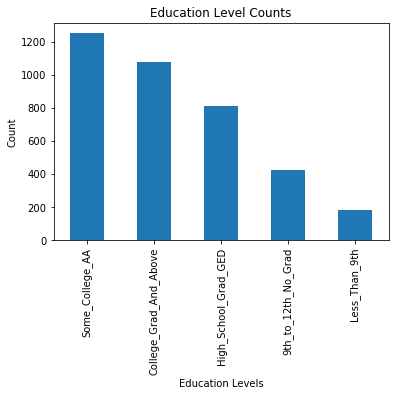

In [40]:
nhanes_data["DMDEDUC2"].value_counts().plot(kind='bar')
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.title('Education Level Counts')

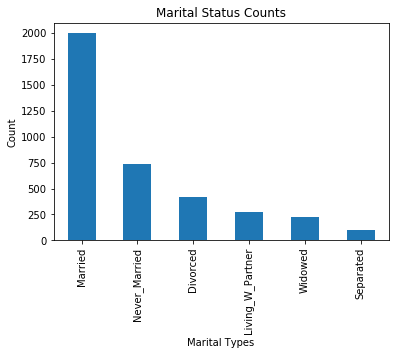

In [41]:
nhanes_data["DMDMARTL"].value_counts().plot(kind='bar')
plt.xlabel('Marital Types')
plt.ylabel('Count')
plt.title('Marital Status Counts')

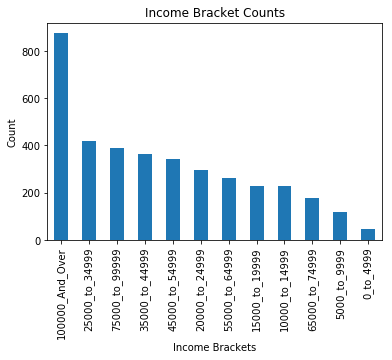

In [42]:
nhanes_data["INDHHIN2"].value_counts().plot(kind='bar')
plt.xlabel('Income Brackets')
plt.ylabel('Count')
plt.title('Income Bracket Counts')

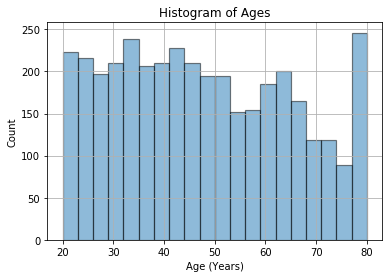

In [43]:
plt.hist(nhanes_data["RIDAGEYR"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.title('Histogram of Ages')
plt.grid(True)

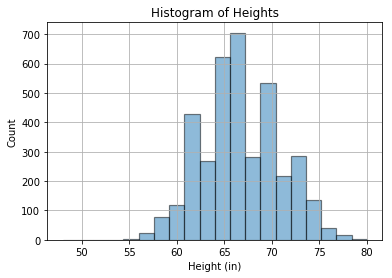

In [44]:
plt.hist(nhanes_data["WHD010"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('Height (in)')
plt.ylabel('Count')
plt.title('Histogram of Heights')
plt.grid(True)

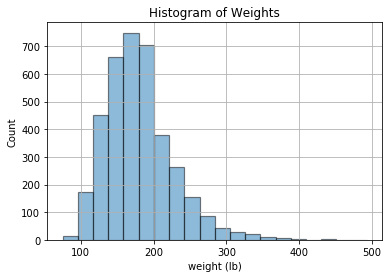

In [45]:
plt.hist(nhanes_data["WHD020"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('weight (lb)')
plt.ylabel('Count')
plt.title('Histogram of Weights')
plt.grid(True)

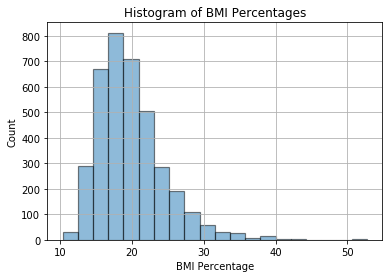

In [46]:
plt.hist(nhanes_data["BMI_Perc"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('BMI Percentage')
plt.ylabel('Count')
plt.title('Histogram of BMI Percentages')
plt.grid(True)

# Create exploratory crosstabulation plots of variables of interest

Below are crosstabs of the categorical variables of interest with respect to the obesity indicator class variable.

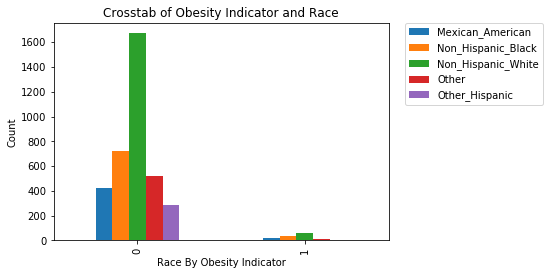

In [47]:
obs_race_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["RIDRETH1"])
obs_race_cross.plot(kind="bar")
plt.xlabel('Race By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Race')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

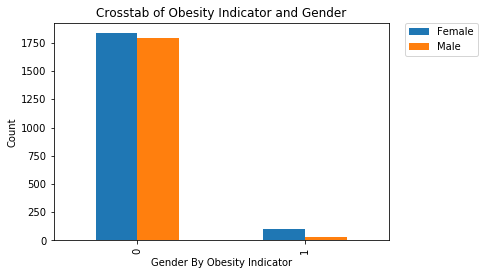

In [48]:
obs_race_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["RIAGENDR"])
obs_race_cross.plot(kind="bar")
plt.xlabel('Gender By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

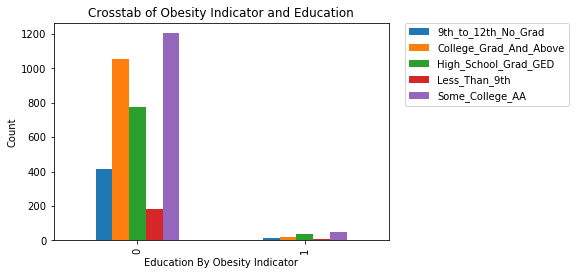

In [49]:
obs_ed_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["DMDEDUC2"])
obs_ed_cross.plot(kind="bar")
plt.xlabel('Education By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Education')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

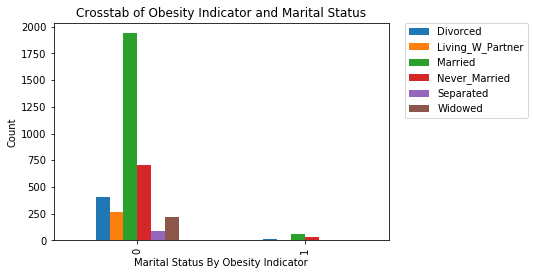

In [50]:
obs_mar_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["DMDMARTL"])
obs_mar_cross.plot(kind="bar")
plt.xlabel('Marital Status By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Marital Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

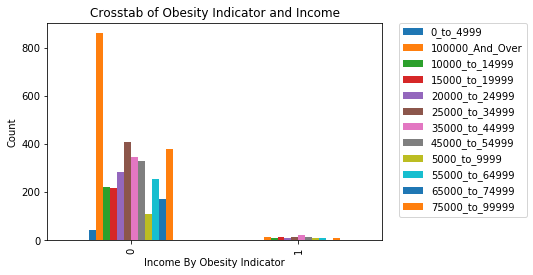

In [51]:
obs_inc_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["INDHHIN2"])
obs_inc_cross.plot(kind="bar")
plt.xlabel('Income By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Create exploratory scatter plots of variables of interest

Below are scatterplots of the continuous variables of interest with BMI.

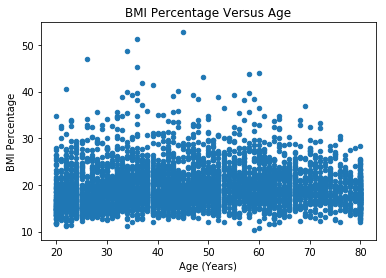

In [52]:
nhanes_data.plot(x="RIDAGEYR", y="BMI_Perc", kind="scatter")
plt.xlabel('Age (Years)')
plt.ylabel('BMI Percentage')
plt.title('BMI Percentage Versus Age')

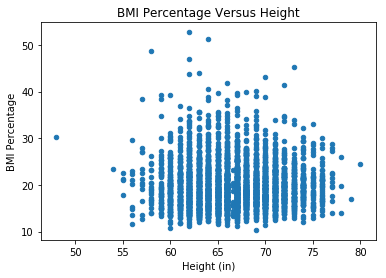

In [53]:
nhanes_data.plot(x="WHD010", y="BMI_Perc", kind="scatter")
plt.xlabel('Height (in)')
plt.ylabel('BMI Percentage')
plt.title('BMI Percentage Versus Height')

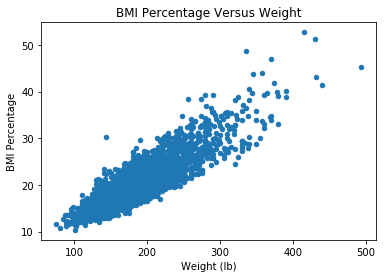

In [54]:
nhanes_data.plot(x="WHD020", y="BMI_Perc", kind="scatter")
plt.xlabel('Weight (lb)')
plt.ylabel('BMI Percentage')
plt.title('BMI Percentage Versus Weight')

# -------------------------- Create All Variable Correlation ----------------------------------------

# Create dummy variables of all categorical variables for correlation

In [55]:
nhanes_spdsht_all = pd.get_dummies(nhanes_data)

In [56]:
num_rows = nhanes_spdsht_all.shape[0] + 1
num_cols = nhanes_spdsht_all.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

# Create correlation matrix of entire dataframe

In [57]:
nhanes_corr = nhanes_spdsht_all.corr(method="pearson")
nhanes_corr.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Correlation Output.csv', sep=",")
nhanes_corr

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,WHD010,WHD020,Weight_kg,Height_m,BMI_Perc,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes,Obese_Ind_0,Obese_Ind_1
RIDAGEYR,1.000000,0.099393,-0.089679,-0.007419,-0.042008,-0.078684,-0.177204,-0.227756,-0.042923,-0.075917,0.033973,-0.048542,0.001725,0.001725,-0.048542,0.029551,-0.020874,0.020874,-0.066194,-0.027693,0.143494,-0.084658,-0.035824,0.009640,0.008845,0.021527,0.097458,-0.078663,0.113703,-0.190165,0.182042,-0.404484,0.008979,0.347756,-0.046152,-0.038537,0.053254,0.046707,0.001037,-0.046612,0.018875,0.029097,0.004539,0.002277,-0.007649,-0.006281,-0.432572,0.432572,0.093108,-0.276485,0.255886,-0.097347,0.097347,-0.115472,0.115472,-0.166346,0.166346,-0.118390,0.118390,-0.030872,0.030872,-0.067006,0.067006,-0.198799,-0.120781,0.082637,0.007207,0.045884,0.010595,0.125183,0.113504,0.055231,-0.096927,0.096927,0.038832,-0.038832,-0.014612,0.014612,0.018311,-0.018311,-0.160419,0.160419,-0.167532,0.167532,-0.224615,0.224615,-0.148219,0.148219,-0.202498,0.202498,-0.184914,0.184914,-0.120417,0.120417,-0.170884,0.170884,-0.090865,0.090865,-0.071137,0.071137,-0.167320,0.167320,-0.046410,0.046410,-0.315372,0.315372,0.033993,-0.033993
INDFMPIR,0.099393,1.000000,0.153555,0.145180,0.363103,0.056779,0.110298,-0.080414,0.047889,-0.025653,0.158692,0.122049,-0.035297,-0.035297,0.122049,-0.108154,-0.054245,0.054245,-0.155170,-0.124824,0.121916,0.151172,-0.048641,-0.232457,0.449516,-0.166539,-0.194793,-0.039277,-0.078043,-0.109432,0.275869,-0.134454,-0.084050,-0.075114,-0.174874,0.675450,-0.299000,-0.268907,-0.283887,-0.270033,-0.119561,-0.037334,-0.241133,0.080248,0.091134,0.261381,0.023384,-0.023384,-0.015751,0.039185,-0.034860,0.011238,-0.011238,-0.008706,0.008706,-0.017910,0.017910,0.132252,-0.132252,0.015762,-0.015762,0.051322,-0.051322,-0.115231,0.028031,-0.030875,-0.042917,-0.036956,0.085068,0.023877,0.007251,0.015782,0.118641,-0.118641,0.045027,-0.045027,-0.009487,0.009487,-0.038098,0.038098,-0.009940,0.009940,0.070847,-0.070847,0.013270,-0.013270,0.032846,-0.032846,0.041041,-0.041041,0.062056,-0.062056,0.047176,-0.047176,0.012780,-0.012780,0.075505,-0.075505,0.031385,-0.031385,0.048321,-0.048321,0.009358,-0.009358,-0.063117,0.063117,0.069961,-0.069961
CBD070,-0.089679,0.153555,1.000000,0.374941,0.249199,0.095908,-0.034514,-0.052953,0.013243,-0.026869,-0.040123,0.014750,-0.023013,-0.023013,0.014750,-0.034706,-0.029668,0.029668,0.069636,-0.151398,0.028924,0.055185,0.017803,0.012549,0.088721,-0.061621,0.020442,-0.049134,-0.132586,-0.013320,0.213177,-0.090167,-0.036538,-0.082101,-0.054410,0.252671,-0.106712,-0.075998,-0.051824,-0.049207,-0.05203

# -------- Create variables for Classification and Clustering -------------------

# Remove create train and target dataframes

Create the class target variable dataframe of the obesity indicator.

In [58]:
target_df = nhanes_data['Obese_Ind']
target_df.head()

SEQN
73557    0
73559    0
73562    0
73564    0
73565    0
Name: Obese_Ind, dtype: category
Categories (2, int64): [0, 1]

Create a training dataframe then remove the obesity indicator from the training dataframe (this is the target and shouldn't be in the training).

In [59]:
train_df = nhanes_data[:]
train_df = train_df.drop('Obese_Ind', 1) 


Remove all of the variables that were used to create the obesity indicator variable.  This was done because these variables would have a strong relation to the obesity indicator due to its calculation.  These variable could take over in any modelling and prediction because of their strong relation.  Since we already know they are related because they were used in the calculation, they are also of no interest.

Note that this code was run 2 different ways.  The first way was with WHD010 and WHD020 removed as is shown below (these are the original height and weight variables used to calculate BMI).  The second way was to leave these variables in the dataset to see what impact they have.  I found that there was fairly poor performance with modelling and prediction without these variables and wanted to see how performance was affected by them.

In [60]:
train_df = train_df.drop('BMI_Perc', 1) 
train_df = train_df.drop('Height_m', 1) 
train_df = train_df.drop('Weight_kg', 1) 
train_df = train_df.drop('WHD010', 1) 
train_df = train_df.drop('WHD020', 1) 
train_df.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,DMDMARTL,INDHHIN2,INDFMPIR,BPQ020,CBD070,CBD090,CBD120,CBD130,DIQ010,DBD895,DBD900,DBD905,DBD910,MCQ080,MCQ365A,MCQ365B,PAD680,SMQ020,HEQ010,HEQ030,HUQ051,HUQ071,MCQ010,MCQ082,MCQ086,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160M,MCQ160K,MCQ160L,MCQ160O,MCQ203,MCQ220
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,Male,69,Non_Hispanic_Black,High_School_Grad_GED,Separated,15000_to_19999,0.84,Yes,300.0,0.0,0.0,85.0,Yes,8.0,8.0,0.0,4.0,Yes,Yes,No,600.0,Yes,No,No,8_to_9,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No
73559,Male,72,Non_Hispanic_White,Some_College_AA,Married,65000_to_74999,4.51,Yes,150.0,25.0,40.0,0.0,Yes,1.0,0.0,0.0,0.0,No,No,No,300.0,Yes,No,No,2_to_3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
73562,Male,56,Mexican_American,Some_College_AA,Divorced,55000_to_64999,4.79,Yes,150.0,60.0,60.0,0.0,No,14.0,14.0,0.0,0.0,Yes,Yes,Yes,360.0,Yes,No,No,4_to_5,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,No,No,No
73564,Female,61,Non_Hispanic_White,College_Grad_And_Above,Widowed,65000_to_74999,5.00,Yes,400.0,100.0,200.0,0.0,No,5.0,1.0,0.0,0.0,Yes,Yes,Yes,60.0,No,No,No,2_to_3,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
73565,Male,42,Other_Hispanic,High_School_Grad_GED,Married,100000_And_Over,5.00,No,900.0,0.0,300.0,40.0,No,15.0,2.0,7.0,0.0,No,No,No,300.0,Yes,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


# Create dummy variables of all categorical variables for classification 

Create dummy variables for all of the categorical variables in training dataset.

In [61]:
train_df_spdsht = pd.get_dummies(train_df)

# Split data into testing and training for classification and clustering 

Split the dataset into 80% training and 20% testing randomly using a given random state to ensure repeatability.

In [62]:
data_train, data_test, target_train, target_test = train_test_split(train_df_spdsht, target_df, test_size = 0.2, random_state = 45)

# Apply max/min normalization to data

Create normalized target and training datasets using min/max normalization.  These normalized datasets will be used in the KNN classification and K-Means clustering.

In [63]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data_train)
data_train_norm_np = min_max_scaler.transform(data_train)
data_test_norm_np = min_max_scaler.transform(data_test)

# Convert target variables into numpy arrays for sklearn functions

In [64]:
data_train_np = np.array(data_train)
data_test_np = np.array(data_test)
target_train_np = np.array(target_train)
target_test_np = np.array(target_test)

print data_train_np.shape
print target_train_np.shape
print data_test_np.shape
print target_test_np.shape


(3003L, 101L)
(3003L,)
(751L, 101L)
(751L,)


# ---------------------------------------- Classification --------------------------------------------------

# Create Functions Needed For Classification

The find_percent function calculates the accuracy for a range of percentage of features passed in.  The optimal percent is then given as the percent with the maximum accuracy value.  If more than one of the percentages have the same accuracy value, the last it taken.  I use the feature_selection.SelectPercentile function with chi2 selection to select the i percent of variables in the dataset (i is given in the loop containing the function call).  Cross validation modelling is then done with the cross_validation.cross_val_score function to calculate the accuracy of each fold.  The mean of these accuracy values is then used as the score for the i percentage.  

In [65]:
def find_percent(train_arr, target_arr, model, percent_list, cv_num):

    print '---------------------------------- Feature Selection ----------------------------------'
        
    results = []
    feature_select = []
    feature_scores = []
    features_pvals = []
    for i in percent_list: # loop over the list of percentages passed in
        
        # extract the ith percentage of variables for use in cross validation
        fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = i)
        train_arr_fs = fs.fit_transform(train_arr, target_arr)
        
        # calculate cross validation accuracy and save them, the mean accuracy, the weights, and the p values into lists
        scores = cross_validation.cross_val_score(model, train_arr_fs, target_arr, cv = cv_num, scoring = "accuracy")
        results = np.append(results, scores.mean())        
        feature_select.append(fs.get_support())
        feature_scores.append(fs.scores_)
        features_pvals.append(fs.pvalues_)
   
    # find the maximum mean accuracy and use as the optimal index - if there more than 1, take the highest percentage value
    optimal_ndx = np.where(results == results.max())[0]    
    if len(optimal_ndx) > 1:
        optimal_ndx = optimal_ndx[-1]
        
    # get the optimal percentage and the corresponding number of features
    optimal_percentile = int(percent_list[optimal_ndx])
    optimal_num_features = int(optimal_percentile * (train_arr.shape[1])/100) 
    
    # get the optimal weights, scores, and p values and store into final variables
    chosen_features = feature_select[int(optimal_ndx)]
    chosen_weights = feature_scores[int(optimal_ndx)]
    chosen_pvals = features_pvals[int(optimal_ndx)]
    
    # plot the percentages vs accuracy and mark the optimal value chosen with an X
    plt.figure()
    plt.xlabel("Percentage of features selected")
    plt.ylabel("Cross validation Accuracy")
    plt.title('Feature Selection Cross Val Accuracy Versus Percentage of Features')   
    plt.plot(percent_list, results)
    plt.plot(optimal_percentile, results[optimal_ndx], 'x', c='k')
    plt.show()   

    return optimal_percentile, optimal_num_features, chosen_features, chosen_weights, chosen_pvals


The optimize_features function below narrows down the list of features used in the final model by removing all features with p values over 0.05 (95% confidence level).  P values over 0.05 correspond to features that fail the test of significance to the model.  By removing features greater than 0.05, the number of features is further reduced and will help with preventing overfitting.  The features are removed one by one, with the feature with the highest p value removed each time. Each time a feature is removed, the cross validation is performed and new p values are computed.  This is repeated until none of the remaining features have p values over 0.05.

In [66]:
def optimize_features(train_arr, target_arr, model, all_attrs, chosen_features, chosen_weights, chosen_pvals, cv_num):

    print 'Feature Optimization (Removal of All Attributes with P Values >= 0.05)'
    print '----------------------------------------------------------------------'
    
    train_all_df = pd.DataFrame(train_arr, columns = all_attrs)
          
    # create a dataframe with 1 row containing the weights from feature selection and create dataframe with selected features
    fs_features = all_attrs[chosen_features]
    train_fs_df = train_all_df[fs_features]
                      
    # extract weights and p values corresponding to selected features
    fs_weights = chosen_weights[chosen_features]
    fs_p_vals = chosen_pvals[chosen_features]
                      
    # create a dataframe with 1 row containing the weights from feature selection
    fs_w_arr = np.zeros((1, len(fs_weights)))
    fs_w_arr[0] = fs_weights
    fs_w_df = pd.DataFrame(fs_w_arr, columns = fs_features)

    # create a dataframe with 1 row containing the p values from feature selection
    fs_p_arr = np.zeros((1, len(fs_p_vals)))
    fs_p_arr[0] = fs_p_vals
    fs_p_df = pd.DataFrame(fs_p_arr, columns = fs_features)

    result = 0
    feature_select = []
    feature_scores = []
    features_pvals = []

    # create model to fit with all current features
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = 100)

    while True:
        
        # find the index of the maximum p value.  if two have the same value, take the index of the first.
        p_vals = np.array(fs_p_df)
        max_ndx = np.where(p_vals == p_vals.max())[1]
        if len(max_ndx) > 1:
            max_ndx = max_ndx[0]
        max_p = p_vals[0, int(max_ndx)]
        
        # if the max p value is less than 0.05, create the list of new features and exit the loop
        if max_p < 0.05:
            new_fs_features = train_fs_df.columns.values.tolist()
            break
                      
        # Remove attribute with max p value over 0.05
        col_names = train_fs_df.columns.values.tolist()
        max_attr = col_names[int(max_ndx)]
                      
        train_fs_df = train_fs_df.drop(max_attr, 1)
        
        # create new array of training data and list of new features
        train_fs_np = np.array(train_fs_df)
        new_fs_features = train_fs_df.columns.values.tolist()

        # fit the model with the new training data (without the max feature)
        train_arr_fs = fs.fit_transform(train_fs_np, target_arr)
        
        # get the accuracy, weights, p values, and mean accuracy of the new model
        scores = cross_validation.cross_val_score(model, train_arr_fs, target_arr, cv = cv_num, scoring = "accuracy")
        result = scores.mean()        
        feature_select = fs.get_support()
        feature_scores = fs.scores_
        features_pvals = fs.pvalues_
              
        # populate a dataframe with the new feature weights
        fs_w_arr = np.zeros((1, len(feature_scores)))
        fs_w_arr[0] = feature_scores
        fs_w_df = pd.DataFrame(fs_w_arr, columns = new_fs_features)

        # populate a dataframe with the new feature p values
        fs_p_arr = np.zeros((1, len(features_pvals)))
        fs_p_arr[0] = features_pvals
        fs_p_df = pd.DataFrame(fs_p_arr, columns = new_fs_features)
                     
    # populate a dataframe with the p values and weights of all of the variables
    all_info_df = pd.DataFrame(all_attrs)
    all_info_df["weights"] = chosen_weights
    all_info_df["p_values"] = chosen_pvals
                                          
    # populate a dataframe with the p values and weights of all the newly reduced features
    fs_info_df = pd.DataFrame(new_fs_features)
    fs_info_df["weights"] = np.array(fs_w_df)[0]
    fs_info_df["p_values"] = np.array(fs_p_df)[0]
                                                              
    # print the results of the optimization
    print 'Final Number of Training Set Attributes:', train_fs_df.shape[1]
    print 'Final Training Set Features Selection Accuracy:', result
    print 'Final Training Set Attributes:'
    print new_fs_features
    print '\n'
                      
    return train_fs_df, all_info_df, fs_info_df


The meausre_performance function below prints the model accuracy, the classificaiton report, and the confusion matrix of a model passed in.

In [67]:
def measure_performance(x_arr, y_arr, model, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred_arr = model.predict(x_arr)   
    if show_accuracy:
        print "Accuracy:"
        print metrics.accuracy_score(y_arr, y_pred_arr), "\n"
            
    if show_classification_report:
        print "Classification Report:"
        print metrics.classification_report(y_arr, y_pred_arr), "\n"
      
    if show_confussion_matrix:
        print "Confussion Matrix:"
        cm = metrics.confusion_matrix(y_arr, y_pred_arr)
        print cm, "\n"


The perform_grid_search function below takes in a dictionary with the parameters and their ranges for usage in grid search model selection and performs the grid search with all of the parameter options.

In [68]:
def perform_grid_search(model, data_train, target_train, data_test, target_test, param_dict, cv_num):

    print '---------------------------------- Parameter Grid Search ----------------------------------'
        
    num_params = len(param_dict.keys())
    gs = GridSearchCV(model, param_dict, verbose=1, cv=cv_num)
    %time _ = gs.fit(data_train, target_train)
    opt_params = gs.best_params_
    opt_score = gs.best_score_
    print '\n'
    print 'Grid Search Optimal Parameters:', opt_params 
    print 'Grid Search Optimal Parameter Score:', opt_score
    print '\n'
    
    # Set the optimal grid search parameters
    for key, value in opt_params.items():
        model.set_params(**{key: value})
    print 'Final Model Parameter Settings:'
    print(model)
    print '\n'
    
    return model


The model_data function below performs both the cross validation modelling and the final modelling with the full training set and the testing set.  The cross validation modelling is what is used to refine the model parameter ranges to be used.  The testing set is used only as an evaluation dataset to judge the final model performance.

In [69]:
def model_data(model, data_train, target_train, data_test, target_test, cv_num):

    # Get the performance of the training and testing data sets
    print '---------------------------------- Training Data Performance ----------------------------------'
    print '\n'
    print 'Final Model Training Set Cross Validation Results'
    print '-------------------------------------------------'
    
    model_cv_data(model, data_train, target_train, cv_num)
    print '\n'
    
    # Fit the training data to the optimal model, using the features from feature selection
    model.fit(data_train, target_train)
    
    print 'Final Model Full Training Set Results'
    print '-------------------------------------'
    measure_performance(data_train, target_train, model, show_accuracy=True, show_confussion_matrix=True, 
                        show_classification_report=True)   
        
    print '\n'
    print '---------------------------------- Testing Data Performance ----------------------------------'   
    print '\n'
    print 'Final Model Testing Set Results'
    print '-------------------------------'
    
    measure_performance(data_test, target_test, model, show_accuracy=True, show_confussion_matrix=True, 
                        show_classification_report=True)
        
    return model


The model_cv_data function below performs cross validation on a training and target dataset passed in.  The mean accuracy of the training and testing datasets are printed at the end.

In [70]:
def model_cv_data(model, data_train, target_train, cv_num):

    # generate the folds for use in each iteration of the cross validation
    kf = KFold(len(data_train), n_folds = cv_num, shuffle=True, random_state=0)
    cross_acc_train = 0
    cross_acc_test = 0
    for trainNdx, testNdx in kf:
        
        # fit a model to the current cross validation training fold and calculate the training accuracy
        model.fit(data_train[trainNdx,:], target_train[trainNdx])
        train_pred = model.predict(data_train[trainNdx,:])
        cross_acc_train += metrics.accuracy_score(target_train[trainNdx], train_pred)

        # calculate the testing accuracy of the current fold
        test_pred = model.predict(data_train[testNdx,:])
        cross_acc_test += metrics.accuracy_score(target_train[testNdx], test_pred)

    acc_cv_train = cross_acc_train/cv_num
    acc_cv_test = cross_acc_test/cv_num

    print cv_num, 'Fold Cross Validation Training Accuracy:'
    print acc_cv_train
    print cv_num, 'Fold Cross Validation Testing Accuracy:'
    print acc_cv_test
    

The create_opt_model function below is a wrapper function that calls the find_percent function, the optimize features function, creates the datasets that are the result of the two feature selection steps, call the grid search function, then calls the model data function.

In [71]:
def create_opt_model(model, data_train, target_train, data_test, target_test, percent_list, param_dict, cv_num, attrs):
    
    # Find the optimal list of features to use
    opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_percent(data_train, target_train, model, percent_list, cv_num)
    print 'Optimal Percent:', opt_percent
    print 'Optimal Number of Features:', opt_num
    print 'Features Chosen:'
    print attrs[chosen_attr]
    print '\n'
    
    train_fs_df, all_info_df, fs_info_df = optimize_features(data_train, target_train, model, attrs, chosen_attr, chosen_w, chosen_p, cv_num)
    
    # Get the training and testing data with chosen features
    selected_features = train_fs_df.columns.values.tolist()
    train_arr_fs = np.array(train_fs_df)  
    
    test_df = pd.DataFrame(data_test, columns = attrs)
    test_fs_df = test_df[selected_features]                                                       
    test_arr_fs = np.array(test_fs_df)
    
    # Perform grid search with parameter dictionary passed in
    opt_model = perform_grid_search(model, train_arr_fs, target_train, test_arr_fs, target_test, param_dict, cv_num)
    
    # Perform grid search with parameter dictionary passed in
    final_model = model_data(opt_model, train_arr_fs, target_train, test_arr_fs, target_test, cv_num)
    
    return final_model, all_info_df, fs_info_df, selected_features
    

# Create feature names array used in feature selection

In [72]:
spdsht_features = np.array(data_train.columns.values.tolist())
print spdsht_features.shape

spdsht_features_df = pd.DataFrame(spdsht_features)
spdsht_features_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Dataset Training Features.csv')

(101L,)


# Decision Tree Classification With Feature Selection

Call the create_opt_model function with the percentage list for feature selection and model parameters and their ranges for grid search model selection.  I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage and parameter values that are used below are the result of several modelling attempts with different value ranges.  The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


Parameters Used:
{'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'criterion': ['entropy', 'gini'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])}


---------------------------------- Feature Selection ----------------------------------


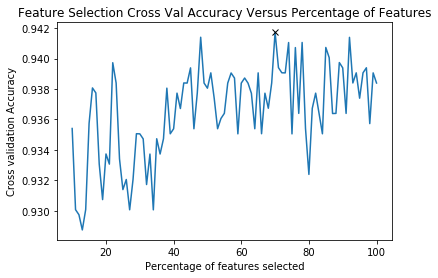

Optimal Percent: 70
Optimal Number of Features: 70
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD895'
 'DBD900' 'DBD905' 'DBD910' 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Other'
 'RIDRETH1_Other_Hispanic' 'DMDEDUC2_9th_to_12th_No_Grad'
 'DMDEDUC2_College_Grad_And_Above' 'DMDEDUC2_High_School_Grad_GED'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Never_Married' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_10000_to_14999' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_20000_to_24999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_45000_to_54999' 'INDHHIN2_5000_to_9999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_No' 'SMQ020_Yes' 'HEQ010_Yes' 'HEQ030_Yes' 'HUQ051_0' 'HUQ051_1'
 'HUQ051_16_Or_More' 'HUQ051_4_to_5' 'HUQ051_6_t

[Parallel(n_jobs=1)]: Done 80000 out of 80000 | elapsed:  7.8min finished


Wall time: 7min 48s


Grid Search Optimal Parameters: {'min_samples_split': 40, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
Grid Search Optimal Parameter Score: 0.968697968698


Final Model Parameter Settings:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.967698951709
10 Fold Cross Validation Testing Accuracy:
0.967027685493


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.96803196803

In [73]:
cv = 10
dt = tree.DecisionTreeClassifier()
percentages = a = np.arange(10, 101, 1)

temp_leaf = np.arange(10, 201, 10)
temp_depth = np.arange(1, 11, 1)

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': temp_depth,
    'min_samples_leaf': temp_leaf,
    'min_samples_split': temp_leaf
}

print 'Percentage List Used:'
print percentages
print '\n'
print 'Parameters Used:'
print parameters
print '\n'

dt_model, dt_all_info_df, dt_fs_info_df, dt_features = create_opt_model(dt, data_train_np, target_train_np, data_test_np, target_test_np, percentages, parameters, cv, spdsht_features)


Print out the number of nodes in the tree.

In [74]:
treeObj = dt_model.tree_
print 'Number of nodes in the tree:'
print treeObj.node_count

Number of nodes in the tree:
23


Save csv files with the feature weights and p values of the feature selection features and all of the original features.

In [75]:
dt_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Chosen Features.csv')

In [76]:
dt_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT All Features.csv')

Compute the feature importances of the model and save them into a csv file.

In [77]:
feature_imp = dt_model.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = dt_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Feature Selection Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,INDHHIN2_15000_to_19999,INDHHIN2_5000_to_9999,BPQ020_No,BPQ020_Yes,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,HUQ051_1,HUQ051_16_Or_More,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ160B_Yes,MCQ160M_Yes,MCQ160O_Yes
0,0.041209,0.165114,0.0,0.0,0.035398,0.0,0.0,0.0,0.063412,0.015271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571543,0.0,0.0,0.108053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create a visualization of the model tree.

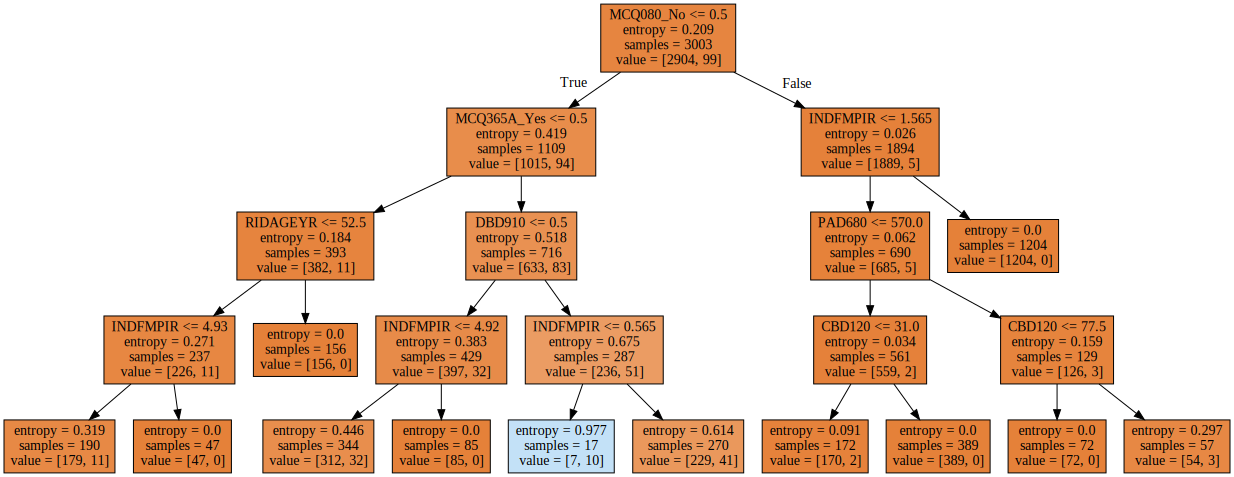

In [78]:
export_graphviz(dt_model, out_file='tree.dot', feature_names=dt_features, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Save the tree visualization to a jpeg file.

In [79]:
system(dot -Tpng tree.dot -o dtree.jpeg)

[]

# Decision Tree Classification With All Features

Call the grid search and model data functions with the full training set (with no feature selection performed).  I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The parameter values that are used below are the result of several modelling attempts with different value ranges.  The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

In [80]:
cv = 10
dt_all = tree.DecisionTreeClassifier()

temp_leaf = np.arange(10, 201, 10)
temp_depth = np.arange(1, 11, 1)

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': temp_depth,
    'min_samples_leaf': temp_leaf,
    'min_samples_split': temp_leaf
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(dt_all, data_train_np, target_train_np, data_test_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
dt_model_all = model_data(opt_model, data_train_np, target_train_np, data_test_np, target_test_np, cv)


Parameters Used:
{'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'criterion': ['entropy', 'gini'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 8000 candidates, totalling 80000 fits


[Parallel(n_jobs=1)]: Done 80000 out of 80000 | elapsed: 16.7min finished


Wall time: 16min 42s


Grid Search Optimal Parameters: {'min_samples_split': 40, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
Grid Search Optimal Parameter Score: 0.968697968698


Final Model Parameter Settings:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.967698951709
10 Fold Cross Validation Testing Accuracy:
0.967027685493


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.9680319680

Print out the number of nodes in the tree.

In [81]:
treeObjAll = dt_model_all.tree_
print 'Number of nodes in the tree:'
print treeObjAll.node_count

Number of nodes in the tree:
23


Compute feature importances and save them to a csv file.

In [82]:
feature_imp = dt_model_all.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = spdsht_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Full Training Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.040991,0.164244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063078,0.01519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568529,0.0,0.0,0.107484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01764,0.0,0.0,0.0,0.0,0.0,0.0


Create the model tree visualization.

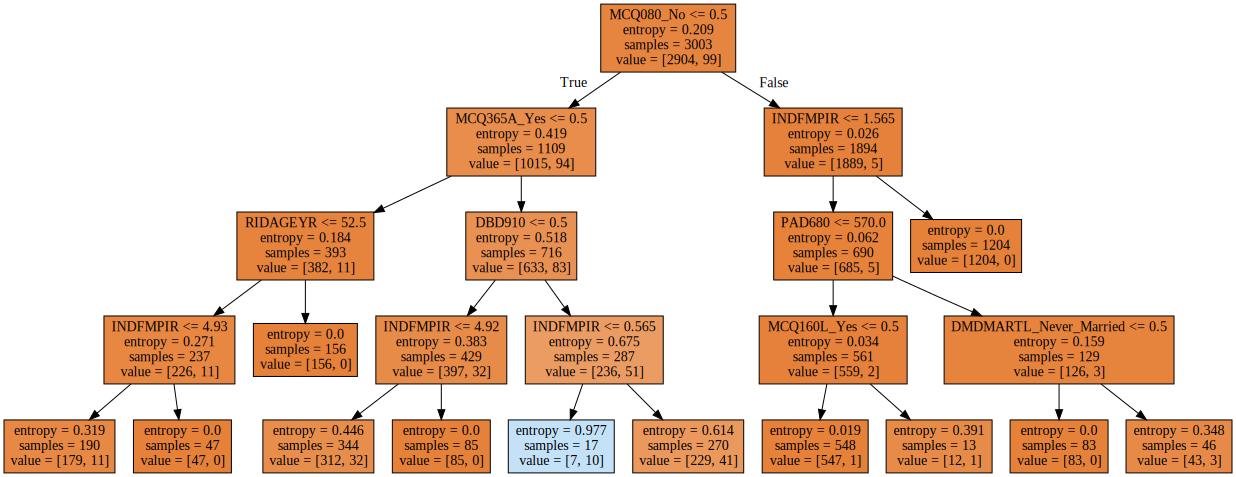

In [83]:
export_graphviz(dt_model_all, out_file='tree_all.dot', feature_names=spdsht_features, filled=True)

with open("tree_all.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Save the model tree to a jpeg file.

In [84]:
system(dot -Tpng tree_all.dot -o dtree_all.jpeg)

[]

# K Nearest Neighbor Classification With Feature Selection

Call the create_opt_model function with the percentage list for feature selection and model parameters and their ranges for grid search model selection.  I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage and parameter values that are used below are the result of several modelling attempts with different value ranges.  The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


Parameters Used:
{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]), 'weights': ['uniform', 'distance']}


---------------------------------- Feature Selection ----------------------------------


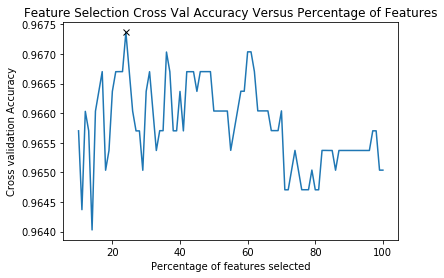

Optimal Percent: 24
Optimal Number of Features: 24
Features Chosen:
['RIAGENDR_Female' 'RIAGENDR_Male' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_College_Grad_And_Above' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_5000_to_9999' 'BPQ020_No' 'BPQ020_Yes' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'HUQ051_1' 'HUQ051_16_Or_More' 'HUQ071_Yes' 'MCQ010_Yes' 'MCQ160B_Yes'
 'MCQ160M_Yes' 'MCQ160O_Yes']


Feature Optimization (Removal of All Attributes with P Values >= 0.05)
----------------------------------------------------------------------
Final Number of Training Set Attributes: 24
Final Training Set Features Selection Accuracy: 0
Final Training Set Attributes:
['RIAGENDR_Female', 'RIAGENDR_Male', 'RIDRETH1_Non_Hispanic_Black', 'RIDRETH1_Other', 'RIDRETH1_Other_Hispanic', 'DMDEDUC2_College_Grad_And_Above', 'INDHHIN2_15000_to_19999', 'INDHHIN2_5000_to_9999', 'BPQ020_No', 'BPQ020_Yes', 'DIQ010_Yes', 'MCQ080

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   33.0s finished


Wall time: 33.1 s


Grid Search Optimal Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Grid Search Optimal Parameter Score: 0.967365967366


Final Model Parameter Settings:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.968142957643
10 Fold Cross Validation Testing Accuracy:
0.966698781838


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.967365967366 

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2904
          1       0.57      0.04      0.08        99

avg / total       0.96      0.97      0.95      300

In [85]:
cv = 10
knn = neighbors.KNeighborsClassifier(p = 2)
percentages = a = np.arange(10, 101, 1)

temp_k = np.arange(5, 201, 5)

parameters = {
    'weights': ['uniform','distance'],
    'n_neighbors': temp_k
}

print 'Percentage List Used:'
print percentages
print '\n'
print 'Parameters Used:'
print parameters
print '\n'

knn_model, knn_all_info_df, knn_fs_info_df, knn_features = create_opt_model(knn, data_train_norm_np, target_train_np, data_test_norm_np, target_test_np, percentages, parameters, cv, spdsht_features)


Save csv file with the weights and p values of the feature selection features and of all of the original features.

In [86]:
knn_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\KNN Chosen Features.csv')

In [87]:
knn_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\KNN All Features.csv')

# K Nearest Neighbor Classification With All Features

Call the grid search and model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The parameter values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

In [88]:
cv = 10
knn_all = neighbors.KNeighborsClassifier(p = 2)

temp_k = np.arange(5, 201, 5)
#temp_k = np.arange(20, 101, 20)

parameters = {
    'weights': ['uniform','distance'],
    'n_neighbors': temp_k
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(knn_all, data_train_norm_np, target_train_np, data_test_norm_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
knn_model_all = model_data(opt_model, data_train_norm_np, target_train_np, data_test_norm_np, target_test_np, cv)


Parameters Used:
{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]), 'weights': ['uniform', 'distance']}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  2.0min finished


Wall time: 1min 59s


Grid Search Optimal Parameters: {'n_neighbors': 10, 'weights': 'uniform'}
Grid Search Optimal Parameter Score: 0.967032967033


Final Model Parameter Settings:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.967032929117
10 Fold Cross Validation Testing Accuracy:
0.967029900332


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.967032967033 

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2904
          1       0.00      0.00      0.00        99

avg / total       0.94      0.97      0.95     

C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy:
0.962716378162 

Classification Report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       723
          1       0.00      0.00      0.00        28

avg / total       0.93      0.96      0.94       751


Confussion Matrix:
[[723   0]
 [ 28   0]] 



# Naive Bayes Gaussian Classification With Feature Selection

Call the find percent and optimize functions to perform feature selection on the training set.  Then call the model data functions with the reduced feature training set. I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

---------------------------------- Feature Selection ----------------------------------


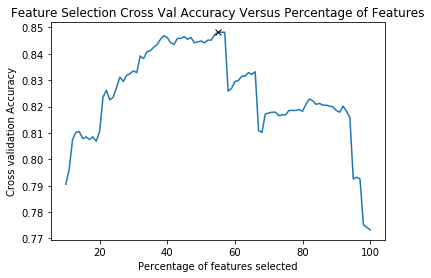

Optimal Percent: 55
Optimal Number of Features: 55
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD900'
 'DBD905' 'DBD910' 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Other'
 'RIDRETH1_Other_Hispanic' 'DMDEDUC2_9th_to_12th_No_Grad'
 'DMDEDUC2_College_Grad_And_Above' 'DMDEDUC2_High_School_Grad_GED'
 'DMDMARTL_Living_W_Partner' 'DMDMARTL_Never_Married'
 'INDHHIN2_100000_And_Over' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_45000_to_54999'
 'INDHHIN2_5000_to_9999' 'BPQ020_No' 'BPQ020_Yes' 'DIQ010_Borderline'
 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No' 'MCQ080_Yes' 'MCQ365A_No'
 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes' 'SMQ020_No' 'SMQ020_Yes'
 'HEQ030_Yes' 'HUQ051_0' 'HUQ051_1' 'HUQ051_16_Or_More' 'HUQ051_6_to_7'
 'HUQ071_Yes' 'MCQ010_No' 'MCQ010_Yes' 'MCQ160B_Yes' 'MCQ160D_Yes'
 'MCQ160E_Yes' 'MCQ160G_Yes' 'MCQ160M_No' 'MCQ160M_Yes' 'MCQ160K_Yes'
 'MCQ160O_Yes']


Feature Opti

In [89]:
cv = 10
nbg = naive_bayes.GaussianNB()
percentages = a = np.arange(10, 101, 1)

opt_percent, opt_num, attr_ndx, attr_w, attr_p = find_percent(data_train_np, target_train_np, nbg, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print spdsht_features[attr_ndx]
print '\n'

train_fs_df, nbg_all_info_df, nbg_fs_info_df = optimize_features(data_train_np, target_train_np, nbg, spdsht_features, attr_ndx, attr_w, attr_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_test_np, columns = spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)
                                                              
nbg_model = model_data(nbg, train_arr_fs, target_train_np, test_arr_fs, target_test_np, cv)


Save csv files with weights and p values with feature selection features and with all of the original features.

In [90]:
nbg_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBG ChosenFeatures.csv')

In [91]:
nbg_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBG All Features.csv')

# Naive Bayes Gaussian Classification With All Features

Call the model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).


In [92]:
cv = 10
nbg_all = naive_bayes.GaussianNB()

nbg_model = model_data(nbg_all, data_train_np, target_train_np, data_test_np, target_test_np, cv)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.782550065681
10 Fold Cross Validation Testing Accuracy:
0.773905869324


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.78687978688 

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.79      0.88      2904
          1       0.12      0.84      0.21        99

avg / total       0.96      0.79      0.85      3003


Confussion Matrix:
[[2280  624]
 [  16   83]] 



---------------------------------- Testing Data Performance ----------------------------------


Final Model Testing Set Results
-------------------------------
Accuracy:
0.784287616511 

Classification Report:
             precision    recall  f1-score   support

          0       0.98     

# Naive Bayes Multinomial Classification With Feature Selection

Call the find percent and optimize functions to perform feature selection on the training set.  Then call the model data functions with the reduced feature training set. I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

---------------------------------- Feature Selection ----------------------------------


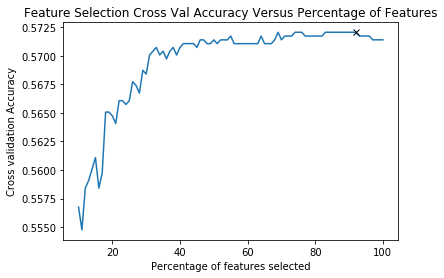

Optimal Percent: 92
Optimal Number of Features: 92
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD895'
 'DBD900' 'DBD905' 'DBD910' 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Separated'
 'DMDMARTL_Widowed' 'INDHHIN2_100000_And_Over' 'INDHHIN2_10000_to_14999'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_20000_to_24999'
 'INDHHIN2_25000_to_34999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_45000_to_54999' 'INDHHIN2_5000_to_9999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' '

In [93]:
cv = 10
nbm = naive_bayes.MultinomialNB()
percentages = a = np.arange(10, 101, 1)

opt_percent, opt_num, attr_ndx, attr_w, attr_p = find_percent(data_train_np, target_train_np, nbm, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print spdsht_features[attr_ndx]
print '\n'

train_fs_df, nbm_all_info_df, nbm_fs_info_df = optimize_features(data_train_np, target_train_np, nbm, spdsht_features, attr_ndx, attr_w, attr_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_test_np, columns = spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)


nbm_model = model_data(nbm, train_arr_fs, target_train_np, test_arr_fs, target_test_np, cv)


Save csv files with the weights and p values of the feature selection features and of all the original features.

In [94]:
nbm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBM Chosen Features.csv')

In [95]:
nbm_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBM All Features.csv')

# Naive Bayes Multinomial Classification With All Features

Call the model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

In [96]:
cv = 10
nbm_all = naive_bayes.MultinomialNB()

nbm_model = model_data(nbm_all, data_train_np, target_train_np, data_test_np, target_test_np, cv)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.577348070913
10 Fold Cross Validation Testing Accuracy:
0.574085271318


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.577755577756 

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.58      0.73      2904
          1       0.05      0.63      0.09        99

avg / total       0.95      0.58      0.70      3003


Confussion Matrix:
[[1673 1231]
 [  37   62]] 



---------------------------------- Testing Data Performance ----------------------------------


Final Model Testing Set Results
-------------------------------
Accuracy:
0.59121171771 

Classification Report:
             precision    recall  f1-score   support

          0       0.97     

# Linear Discriminant Analysis Classification With All Features

Call the model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

In [97]:
cv = 10
lda_all = LinearDiscriminantAnalysis()

lda_model = model_data(lda_all, data_train_np, target_train_np, data_test_np, target_test_np, cv)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------


C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


10 Fold Cross Validation Training Accuracy:
0.965626905763
10 Fold Cross Validation Testing Accuracy:
0.96003654485


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.965034965035 

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2904
          1       0.43      0.18      0.26        99

avg / total       0.95      0.97      0.96      3003


Confussion Matrix:
[[2880   24]
 [  81   18]] 



---------------------------------- Testing Data Performance ----------------------------------


Final Model Testing Set Results
-------------------------------
Accuracy:
0.956058588549 

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       723
          1       0.27      0.11      0.15        28

avg / total       0.94      0.96      0.95       751


Confussion Matrix:
[[715   8]
 [ 25   3]] 



# ----------------------------------- K Means Clustering ----------------------------------------------

# Create Function Needed For K Means Clustering

The find_opt_k function below performs clustering with several different values of k and computes the sum square error of the clustering for each k value.  The optimal k value is chosen to be the knee of the sum square error versus k plot (where the sum square error values stop decreasing rapidly and start to decrease slowly).  The knee is found by finding the slopes between each sum square error point and determining when the slope begins to decrease.  A tolerance is used to determine when the slope values are levelling off.  The tolerance value chosen is determined by trying multiple values until the correct one has been found.

In [98]:
def find_opt_k(data_train, k_vals, tol):
    
    all_sse_dist = []
    for i in k_vals:
        
        # perform k means clustering with i number of clusters
        kmeans = KMeans(n_clusters = i, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
        kmeans.fit(data_train)
        clusters = kmeans.predict(data_train)
        centers = kmeans.cluster_centers_

        # calculate the sum square error for the current cluster
        sum_sse_dist = calc_cluster_error(centers, clusters, data_train)        
        all_sse_dist.append(sum_sse_dist)

    all_sse_dist = np.array(all_sse_dist)
    # find the elementwise difference in the all_sse_dist array (is the slope of the sse points)
    temp_diff = np.diff(all_sse_dist)
    # multiply this diff slope array by -1 to make all neg slopes pos and vis versa (for use with tolerance)
    #find the indices where the diff slope is greater than the tolerance
    temp_ndx = np.where(temp_diff > tol)[0]
    # increment the first index found by 1 to set it to the corresponding point in the values array
    opt_ndx = temp_ndx[0] + 1
    # extract the optimal param value using the index above
    optimal_k = k[opt_ndx]
    
    print 'Optimal K Value:', optimal_k

    # plot the sum square errors versus k
    plt.figure()
    plt.xlabel("K Values")
    plt.ylabel("Cluster SSE")
    plt.title('Cluster SSE Versus K Values')   
    plt.plot(k, all_sse_dist)
    plt.plot(optimal_k, all_sse_dist[opt_ndx], 'x', c='k')
    plt.show()   

    # plot the slope between the sum square error points used to determine the knee point
    plt.figure()
    plt.xlabel("K Values")
    plt.ylabel("Cluster SSE Diff")
    plt.title('Cluster SSE Diff Versus K Values')   
    plt.plot(k[1:len(k)], temp_diff)
    plt.plot(optimal_k, temp_diff[opt_ndx-1], 'x', c='k')
    plt.show()   
    
    return optimal_k


The calc_cluster_error function below computes the total sum square error for all of the clusters based on the cluster centers and the training data instances.  The sum square error is defined as the sum of the squares of the differences between the training instances and the cluster center of the cluster they are assigned to.

In [99]:
def calc_cluster_error(centers, clusters, data_train):
    
    uniq_clusters = np.array(np.unique(clusters))
    
    sse_dist_cent = []
    for j in uniq_clusters:
        
        # get the cluster center and the training data that has been assigned to the current cluster center
        cluster_center = centers[j]
        cluster_ndx = clusters == j
        cluster_pts = data_train[cluster_ndx]
        
        # create an array the size of the cluster training data with the cluster center (for used in subtraction)
        center_arr = np.ones((cluster_pts.shape[0], cluster_pts.shape[1])) * cluster_center

        # calculate the sum square error of the training instances to the cluster center
        dist_to_center = cluster_pts - center_arr
        sq_dist_center = np.square(dist_to_center)
        sum_sq_dist = sq_dist_center.sum(axis=1)
        sum_sse_dist = sum_sq_dist.sum(axis=0)
        sse_dist_cent.append(sum_sse_dist)

    # sum the sum square error from all the clusters
    sse_dist_cent = np.array(sse_dist_cent)
    sum_sse_dist = sse_dist_cent.sum()
    
    return sum_sse_dist
    

# Create full dataset numpy array

In [100]:
data_train_all = np.array(train_df_spdsht)
target_all = np.array(target_df)

# Create normalized full training data

In [101]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train_df_spdsht)
data_all_norm_np = min_max_scaler.transform(train_df_spdsht)


# K Means Clustering With Full Training Set

Call the find_opt_k function to find the optimal k value for the clustering of the full original (non-normalized) training data (before train/test split).

Optimal K Value: 8


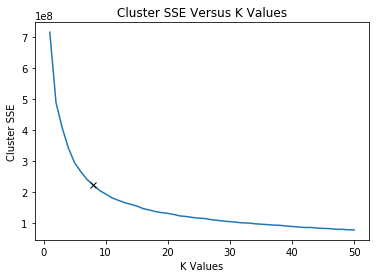

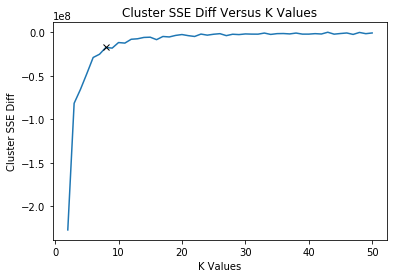

In [102]:
k = np.arange(1, 51, 1)
tol = -0.2 * (10**8)

optimal_k = find_opt_k(data_train_all, k, tol)

Perform k means clustering with the optimal k values calculated above.

In [103]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_all)
clusters = kmeans.predict(data_train_all)
centers = kmeans.cluster_centers_


Calculate the sum square error of the final clustering with the optimal k value.

In [104]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_all)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
222817306.81


Create names to be used for each row of the cluster center dataframe created below.

In [105]:
cluster_names = []
uniq_cluster = np.unique(clusters)
for i in uniq_cluster:
    temp_str = 'Cluster_' + str(i)
    cluster_names.append(temp_str)


Create a dataframe with the cluster center values.

In [106]:
spdsht_features = np.array(train_df_spdsht.columns.values.tolist())
centroid_df = pd.DataFrame(centers, index = cluster_names)
centroid_df.columns = spdsht_features
centroid_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
Cluster_0,45.143491,2.382637,498.196746,44.721893,125.362426,21.134615,3.377219,1.727811,2.074150,2.674556,257.150742,0.523669,0.476331,0.208580,0.127219,0.433432,0.139053,0.091716,0.159763,0.207101,0.235207,0.069527,0.328402,0.071006,0.090237,0.605030,0.164201,2.810651e-02,0.041420,7.396450e-03,0.170118,4.437870e-02,6.213018e-02,1.153846e-01,0.146450,1.094675e-01,0.097633,0.019231,7.396450e-02,0.048817,0.105030,0.698225,0.301775,0.034024,0.857988,0.107988,0.631657,0.368343,0.708580,0.291420,0.630178,0.369822,0.547337,0.452663,0.989645,1.035503e-02,0.994083,5.917160e-03,0.181953,0.178994,0.053254,2.071006e-02,0.050296,0.284024,0.130178,0.059172,4.142012e-02,0.892012,0.107988,0.810651,0.189349,0.995562,4.437870e-03,0.988166,0.011834,0.970414,2.958580e-02,0.982249,1.775148e-02,0.971893,0.028107,0.979290,2.071006e-02,0.965976,3.402367e-02,0.976331,0.023669,0.988166,1.183432e-02,0.903846,0.096154,0.942308,0.057692,0.963018,0.036982,0.979290,2.071006e-02,0.970414,2.958580e-02,0.909763,0.090237
Cluster_1,50.844037,2.438589,201.141055,16.025476,92.181193,18.975917,4.119266,2.113532,2.299957,2.810643,570.221217,0.535550,0.464450,0.058486,0.313073,0.467890,0.106651,0.053899,0.095183,0.259174,0.255734,0.037844,0.352064,0.183486,0.063073,0.381881,0.230505,3.784404e-02,0.103211,2.637615e-02,0.118119,1.123853e-01,7.683486e-02,8.256881e-02,0.133028,1.238532e-01,0.105505,0.038991,5.389908e-02,0.041284,0.087156,0.547018,0.452982,0.040138,0.809633,0.150229,0.583716,0.416284,0.683486,0.316514,0.568807,0.431193,0.555046,0.444954,0.993119,6.880734e-03,0.981651,1.834862e-02,0.108945,0.165138,0.055046,2.866972e-02,0.069954,0.303899,0.152523,0.079128,3.669725e-02,0.856651,0.143349,0.809633,0.190367,0.995413,4.587156e-03,0.988532,0.011468,0.957569,4.243119e-02,0.963303,3.669725e-02,0.947248,0.052752,0.972477,2.752294e-02,0.958716,4.128440e-02,0.950688,0.049312,0.981651,1.834862e-02,0.883028,0.116972,0.938073,0.061927,0.961009,0.038991,0.951835,4.816514e-02,0.971330,2.866972e-02,0.876147,0.123853
Cluster_2,48.456241,2.214304,197.018651,17.946915,92.044476,18.873745,3.845050,2.007174,2.087251,3.074434,245.274032,0.536585,0.463415,0.113343,0.229555,0.454806,0.100430,0.101865,0.143472,0.216643,0.238164,0.067432,0.334290,0.160689,0.070301,0.398852,0.253945,3.012912e-02,0.086083,1.865136e-02,0.098996,8.321377e-02,8.608321e-02,1.162123e-01,0.131994,1.047346e-01,0.084648,0.076040,7.317073e-02,0.053085,0.073171,0.652798,0.347202,0.028694,0.880918,0.090387,0.675753,0.324247,0.767575,0.232425,0.678623,0.321377,0.539455,0.4

Save the cluster center values to a csv file.

In [107]:
centroid_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Optimal Clusters.csv')

# K Means Clustering With Normalized Full Training Set 

Call the find_opt_k function to find the optimal k value for the clustering of the full normalized training dataset (before train/test split).

Optimal K Value: 12


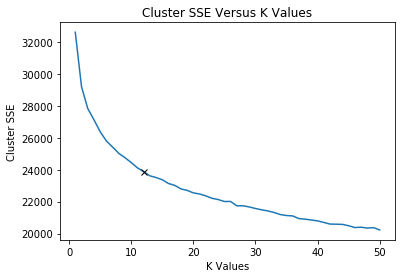

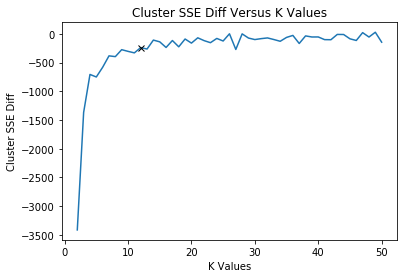

In [108]:
k = np.arange(1, 51, 1)
tol = -250

optimal_k = find_opt_k(data_all_norm_np, k, tol)

Perform k means clustering with the optimal k values calculated above.

In [109]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_all_norm_np)
clusters = kmeans.predict(data_all_norm_np)
centers = kmeans.cluster_centers_


Calculate the sum square error of the final clustering with the optimal k value.

In [110]:
sse_center_dist = calc_cluster_error(centers, clusters, data_all_norm_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
23907.8460861


Create names to be used for each row of the cluster center dataframe created below.

In [111]:
cluster_names = []
uniq_cluster = np.unique(clusters)
for i in uniq_cluster:
    temp_str = 'Cluster_' + str(i)
    cluster_names.append(temp_str)


Create a dataframe with the cluster center values.

In [112]:
centroid_df = pd.DataFrame(centers, index = cluster_names)
centroid_df.columns = spdsht_features
centroid_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
Cluster_0,0.376740,0.489477,0.104198,0.027197,0.079011,0.025883,0.143223,0.095936,0.017420,0.019756,0.345792,1.000000e+00,1.276756e-15,0.051282,0.194139,0.615385,0.084249,0.054945,0.161172,0.238095,0.201465,2.197802e-02,0.377289,0.124542,0.139194,0.413919,0.249084,0.032967,0.040293,2.197802e-02,0.201465,0.062271,0.065934,0.084249,0.113553,0.120879,0.080586,6.227106e-02,0.047619,0.040293,0.098901,9.926740e-01,7.326007e-03,0.010989,0.956044,0.032967,0.842491,0.157509,0.989011,0.010989,0.897436,0.102564,-1.110223e-16,1.000000e+00,0.996337,0.003663,0.989011,0.010989,0.142857,0.194139,0.025641,1.465201e-02,0.062271,0.296703,0.153846,0.076923,0.032967,0.904762,0.095238,0.805861,0.194139,0.996337,3.663004e-03,0.974359,2.564103e-02,0.989011,0.010989,0.992674,7.326007e-03,0.989011,1.098901e-02,0.996337,0.003663,0.989011,1.098901e-02,0.985348,0.014652,0.985348,1.465201e-02,8.937729e-01,1.062271e-01,0.919414,0.080586,0.974359,0.025641,0.981685,1.831502e-02,0.989011,0.010989,0.897436,0.102564
Cluster_1,0.312461,0.386441,0.094686,0.019769,0.064955,0.025169,0.121729,0.094682,0.012871,0.019870,0.327263,1.000000e+00,-3.386180e-15,0.186916,0.254673,0.280374,0.147196,0.130841,0.107477,0.067757,0.242991,6.308411e-02,0.518692,0.142523,0.084112,0.378505,0.334112,0.032710,0.028037,1.869159e-02,0.074766,0.060748,0.074766,0.119159,0.177570,0.105140,0.109813,4.906542e-02,0.060748,0.049065,0.100467,8.855140e-01,1.144860e-01,0.009346,0.974299,0.016355,0.873832,0.126168,0.997664,0.002336,0.913551,0.086449,1.000000e+00,-1.498801e-15,0.988318,0.011682,0.995327,0.004673,0.219626,0.175234,0.044393,2.570093e-02,0.023364,0.294393,0.128505,0.053738,0.035047,0.913551,0.086449,0.850467,0.149533,0.992991,7.009346e-03,0.985981,1.401869e-02,0.992991,0.007009,0.995327,4.672897e-03,1.000000,-3.053113e-16,0.997664,0.002336,0.995327,4.672897e-03,0.995327,0.004673,0.997664,2.336449e-03,9.509346e-01,4.906542e-02,0.971963,0.028037,0.981308,0.018692,0.995327,4.672897e-03,0.971963,0.028037,0.962617,0.037383
Cluster_2,0.444655,0.899758,0.124960,0.033684,0.134056,0.033614,0.216724,0.080788,0.021946,0.011333,0.412096,2.220446e-16,1.000000e+00,0.013793,0.072414,0.568966,0.306897,0.037931,0.006897,0.958621,0.013793,-1.110223e-16,0.020690,0.048276,0.020690,0.824138,0.089655,0.006897,0.010345,-5.551115e-17,0.779310,0.003448,0.006897,0.006897,0.010345,0.027586,0.037931,-2.498002e-16,0.027586,0.017241,0.082759,8.655172e-01,1.344828e-01,0.003448,0.968966,0.027586,0.848276,0.151724,0.958621,0.041379,0.800000,0.200000,8.103448e-01,1.896552e-01,0.98

Save the cluster center values to a csv file.

In [113]:
centroid_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Optimal Clusters Norm.csv')

# K Means Clustering With K = 2 For Scoring on Full Training

Create 2 clusters on the full original (non-normalized) training data (before the train/test split) for use in comparison to the class variable.

In [114]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_all)
clusters = kmeans.predict(data_train_all)
centers = kmeans.cluster_centers_

Calculate the sum square error of the above clustering.

In [115]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_all)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
489032287.811


Compute the completeness of the k = 2 clustering assignments and the class variable.

In [116]:
print 'Clustering Completeness Score:', completeness_score(target_all, clusters)

Clustering Completeness Score: 0.000326377661238


Compute the homogeneity of the k = 2 clustering assignments and the class variable.

In [117]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_all, clusters)

Clustering Homogeneity Score: 0.00105871216439


# K Means Clustering With K = 2 For Scoring on Normalized Full Training

Create 2 clusters on the full normalized training data (before train/test split) for use in comparison to the class variable.

In [118]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_all_norm_np)
clusters = kmeans.predict(data_all_norm_np)
centers = kmeans.cluster_centers_

Calculate the sum square error of the above clustering.

In [119]:
sse_center_dist = calc_cluster_error(centers, clusters, data_all_norm_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
29217.2051317


Compute the completeness of the k = 2 clustering assignments and the class variable.

In [120]:
print 'Clustering Completeness Score:', completeness_score(target_all, clusters)

Clustering Completeness Score: 0.0302735584693


Compute the homogeneity of the k = 2 clustering assignments and the class variable.

In [121]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_all, clusters)

Clustering Homogeneity Score: 0.132366825554


# Create Functions Needed For K Means Clustering Prediction On Split Data

The classify_rocchio function below calculates the cosine distance between a prototype vector and a test instance passed in.  The class that is passed back is the class corresponding to the closest distance.

In [122]:
def classify_rocchio(proto_vectors, training_classes, test_inst):

    proto_norm = np.array([np.linalg.norm(proto_vectors[i]) for i in range(len(proto_vectors))])
    test_case_norm = np.linalg.norm(test_inst)
    sims = np.dot(proto_vectors, test_inst) / (proto_norm * test_case_norm)
    dists = 1 - sims
    
    idx = np.argsort(dists) # sorting
    
    return training_classes[idx[0]], dists[idx]


The perform_rocchio function below classifies several testing instances using the classify_rocchio function.  It also calculates the accuracy (the number of correctly classified instances divided by the total number of instances).

In [123]:
def perform_rocchio(proto_vectors, train_classes, test_data, test_classes, verbose = 0):

    num_tests = test_data.shape[0]
    uniq_classes = np.unique(train_classes)
    
    if verbose == 1:
        print 'Doc Number\tPred Class\tActual Class\tEuclidean Distance'
    
    num_correct = 0
    for x in range(num_tests):
        pred_class, distances = classify_rocchio(proto_vectors, uniq_classes, test_data[x,:])
        if pred_class == test_classes[x]:
            num_correct += 1
            
        if verbose == 1:
            print '{}\t\t{}\t\t{}\t\t{}'.format(x, int(pred_class), test_classes[x], distances[0]) 
    calc_accuracy = float(num_correct) / num_tests
    
    return calc_accuracy


# K Means With K = 2 For Scoring And Prediction on Split Data

Perform clustering on the training data that was split with 80% of the original dataset.

In [124]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_np)
clusters = kmeans.predict(data_train_np)
centers = kmeans.cluster_centers_

Calculate the sum square error of the clustering above.

In [125]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
399531916.162


Compute the completeness of the k = 2 clustering assignments and the class variable.

In [126]:
print 'Clustering Completeness Score:', completeness_score(target_train_np, clusters)

Clustering Completeness Score: 0.000250870251492


Compute the homogeneity of the k = 2 clustering assignments and the class variable.

In [127]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_train_np, clusters)

Clustering Homogeneity Score: 0.000824299250945


Call the perform_rocchio function to perform the prediction of the training instances to see how well they are classified.

In [128]:
acc = perform_rocchio(centers, clusters, data_train_np, target_train_np)
print 'Clustering Prediction Accuracy of Training Data:', acc

Clustering Prediction Accuracy of Training Data: 0.375957375957


Call the perform_rocchio function to perform the prediction of the testing instances (the 20% from the train/test split).

In [129]:
acc = perform_rocchio(centers, clusters, data_test_np, target_test_np)
print 'Clustering Prediction Accuracy of Testing Data:', acc

Clustering Prediction Accuracy of Testing Data: 0.411451398136


# K Means With K = 2 For Scoring And Prediction on Normalized Split Data

Perform clustering on the normalized training data that was split with 80% of the original dataset.

In [130]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_norm_np)
clusters = kmeans.predict(data_train_norm_np)
centers = kmeans.cluster_centers_

Calculate the sum square error of the clustering above.

In [131]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_norm_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
23392.0780824


Compute the completeness of the k = 2 clustering assignments and the class variable.

In [132]:
print 'Clustering Completeness Score:', completeness_score(target_train_np, clusters)

Clustering Completeness Score: 0.0301048159726


Compute the homogeniety of the k = 2 clustering assignments and the class variable.

In [133]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_train_np, clusters)

Clustering Homogeneity Score: 0.134885949373


Call the perform_rocchio function to perform the prediction of the normalized training instances to see how well they are classified.

In [134]:
acc = perform_rocchio(centers, clusters, data_train_norm_np, target_train_np)
print 'Clustering Prediction Accuracy of Training Data:', acc

Clustering Prediction Accuracy of Training Data: 0.324675324675


Call the perform_rocchio function to perform the prediction of the normalized testing instances (the 20% from the train/test split).

In [135]:
acc = perform_rocchio(centers, clusters, data_test_norm_np, target_test_np)
print 'Clustering Prediction Accuracy of Testing Data:', acc

Clustering Prediction Accuracy of Testing Data: 0.315579227696


# Perform PCA on the Normalized Full Training Set

Perform PCA on the full normalized training data (before the train/test split) with the number of features set to the number of variables in the dataset. This is done so the variance explained by each variable can be used to determine the number of components needed to capture 90% of the total variance.

In [136]:
num_features = data_all_norm_np.shape[1]
pca_norm = decomposition.PCA(n_components = num_features)
data_full_norm_trans = pca_norm.fit(data_all_norm_np).transform(data_all_norm_np)

In [137]:
np.set_printoptions(precision=2, suppress=True)

In [138]:
var_explained = pca_norm.explained_variance_ratio_
print 'Variance Explained By PCA Components = ', var_explained.sum()
print var_explained

Variance Explained By PCA Components =  1.0
[ 0.13  0.07  0.06  0.05  0.05  0.04  0.03  0.03  0.03  0.03  0.03  0.02
  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]


Find the number of components needed to cover 90% of the variance.

In [139]:
val = np.arange(1,len(var_explained), 1)
desired_var = 0.90

for i in val:
    temp_sum = var_explained[0:i].sum()
    if temp_sum > desired_var:
        break
        
num_pca_features = i
print 'Variance Explained By', num_pca_features, 'PCA Components = ', var_explained[0:num_pca_features].sum()

Variance Explained By 38 PCA Components =  0.903940786395


Perform PCA with the number of components required for 90% of the variance.

In [140]:
pca_norm = decomposition.PCA(n_components = num_pca_features)
data_full_norm_trans = pca_norm.fit(data_all_norm_np).transform(data_all_norm_np)

In [141]:
var_explained = pca_norm.explained_variance_ratio_
print 'Variance Explained By First', num_pca_features, '=', var_explained.sum()
print var_explained

Variance Explained By First 38 = 0.903815542161
[ 0.13  0.07  0.06  0.05  0.05  0.04  0.03  0.03  0.03  0.03  0.03  0.02
  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01]


Get and print the PCA components created.

In [142]:
pca_comps_norm = pca_norm.components_
pca_comp_norm_df = pd.DataFrame(pca_comps_norm, columns = spdsht_features)
pca_comp_norm_df.head()

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.087045,-0.014325,-0.003396,-0.000193,-0.004972,-0.002587,-0.011775,-0.006976,-0.002178,-0.000090,0.011763,0.085884,-0.085884,0.013351,0.010366,0.023798,-0.048395,0.000881,-0.005215,-0.059444,0.019193,0.006788,0.038679,0.019144,-0.018556,0.015150,-0.052934,0.004736,0.032459,0.000194,-0.041829,0.007032,0.007971,0.004015,-0.003685,0.011422,0.003094,0.004420,0.008607,0.002677,-0.003919,-0.250911,0.250911,0.020888,-0.141615,0.120727,-0.347201,0.347201,-0.347464,0.347464,-0.356700,0.356700,-0.053504,0.053504,-0.001640,0.001640,-0.005163,0.005163,-0.103493,-0.050001,0.030281,0.008490,0.034043,-0.007230,0.051314,0.027408,0.009188,-0.064290,0.064290,-0.059568,0.059568,0.000650,-0.000650,0.000514,-0.000514,-0.026247,0.026247,-0.026974,0.026974,-0.024258,0.024258,-0.018523,0.018523,-0.023560,0.023560,-0.017290,0.017290,-0.009217,0.009217,-0.064851,0.064851,-0.035834,0.035834,-0.023799,0.023799,-0.020917,0.020917,-0.002997,0.002997,-0.043843,0.043843
1,0.074975,-0.111405,-0.007730,-0.002289,-0.018634,0.000462,0.005691,0.016960,-0.002409,0.000415,-0.009993,-0.377495,0.377495,-0.020285,0.020526,0.095422,-0.084073,-0.011590,0.066093,-0.179847,0.093591,0.012645,0.007518,0.023656,0.025111,-0.065355,-0.006044,0.010508,0.012125,0.003045,-0.143322,0.030824,0.033063,0.031366,0.024993,0.023519,0.007514,0.014854,0.005735,-0.005737,-0.025853,-0.147666,0.147666,0.007447,-0.047123,0.039676,0.060209,-0.060209,0.055883,-0.055883,0.052529,-0.052529,-0.503533,0.503533,0.000628,-0.000628,-0.009592,0.009592,0.042085,-0.013028,0.006122,-0.003511,0.013243,-0.041148,-0.013253,0.003962,0.005528,-0.024020,0.024020,-0.005320,0.005320,0.003538,-0.003538,0.008730,-0.008730,-0.026196,0.026196,-0.018359,0.018359,-0.035045,0.035045,-0.016114,0.016114,-0.039272,0.039272,-0.024237,0.024237,-0.017155,0.017155,0.047437,-0.047437,-0.024134,0.024134,-0.012653,0.012653,-0.034904,0.034904,0.000682,-0.000682,-0.046143,0.046143
2,0.063128,0.263650,0.020652,0.007222,0.039607,0.004334,0.026990,-0.014244,0.001821,-0.003299,0.022038,-0.410983,0.410983,-0.028517,-0.125558,0.099721,0.074747,-0.020393,-0.062139,0.326822,-0.083575,-0.012352,-0.168756,-0.089060,-0.054924,0.388870,-0.171200,-0.025100,-0.048586,-0.013715,0.307200,-0.062273,-0.051214,-0.047123,-0.074352,-0.038347,-0.028250,-0.040511,0.002337,0.004032,0.042216,-0.015618,0.015618,0.008145,-0.026081,0.017936,-0.019908,0.019908,-0.078510,0.078510,-0.081624,0.081624,0.116513,-0.116513,0.000319,-0.000319,0.007796,-0.007796,-0.029626,0.039738,-0.003004,-0.011048,-0.020933,0.051095,-0.0159

Save the PCA components to a csv file.

In [143]:
pca_comp_norm_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Full Normalized Training PCA Components.csv')

# Find K Value of Clustering with Normalized Full Training PCA Variables

Call the find_opt_k function to find the optimal k value for the clustering of the PCA components.

Optimal K Value: 11


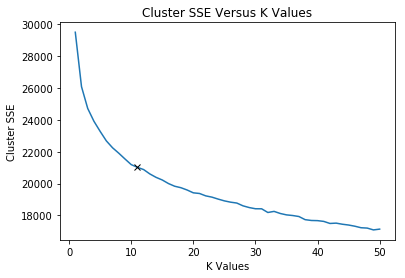

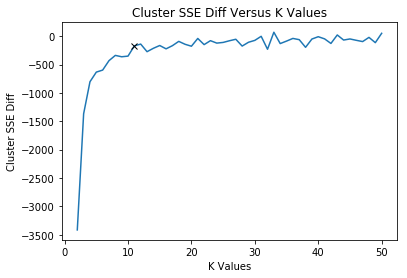

In [144]:
k = np.arange(1, 51, 1)
tol = -200

optimal_k = find_opt_k(data_full_norm_trans, k, tol)

Perform k means clustering with the optimal k values calculated above.

In [145]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_full_norm_trans)
clusters = kmeans.predict(data_full_norm_trans)
centers = kmeans.cluster_centers_


In [146]:
print clusters.shape

(3754L,)


Calculate the sum square error of the final clustering with the optimal k value.

In [147]:
sse_center_dist = calc_cluster_error(centers, clusters, data_full_norm_trans)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
20993.1115436


Create names to be used for each row of the cluster center dataframe created below.

In [148]:
cluster_names = []
uniq_cluster = np.unique(clusters)
for i in uniq_cluster:
    temp_str = 'Cluster_' + str(i)
    cluster_names.append(temp_str)

Create a dataframe with the cluster center values.

In [149]:
centroid_df = pd.DataFrame(centers, index = cluster_names)
centroid_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Cluster_0,0.239095,0.058346,-0.599115,1.007538,0.523839,-0.073311,-0.064639,0.095184,-0.080797,-0.129234,-0.023698,-0.136282,-0.037948,-0.067097,-0.091403,0.073652,0.030513,0.050030,0.008709,0.064618,-0.117981,-0.053731,-0.035009,0.016903,0.022605,0.009655,-0.030762,-0.003307,-0.034290,-0.017301,0.007466,-0.035946,0.018436,0.018538,-0.011064,0.015342,-0.012024,-0.001893
Cluster_1,-0.987256,-0.016612,0.198918,-0.661052,0.418071,0.391549,0.087089,-0.121072,0.012615,0.192366,0.025533,0.036975,0.074573,-0.015148,-0.026649,0.034094,0.036770,-0.036079,-0.015024,0.036791,0.021086,-0.010570,-0.049076,0.011571,-0.012869,-0.019191,-0.000135,0.028076,-0.004312,-0.008740,-0.004278,0.005057,-0.001113,-0.025331,-0.020891,0.006046,-0.019540,-0.013554
Cluster_2,-0.710055,-0.886410,-0.207223,0.275228,-0.038128,-0.037585,-0.421928,-0.372934,0.281728,0.055423,0.125447,-0.044331,-0.069784,0.013059,0.052839,-0.017852,-0.017890,0.050016,0.006703,0.145992,0.024987,0.022028,0.049493,0.003420,-0.055828,0.016952,-0.004020,0.012874,0.047296,-0.017656,0.012769,0.032767,0.004913,-0.006002,0.006428,0.006656,0.013103,-0.008514
Cluster_3,-0.837941,-0.554270,0.956090,0.341017,-0.234736,-0.176421,0.246569,0.140189,-0.022571,-0.171441,-0.093032,0.081543,-0.022508,0.052283,0.000563,-0.062485,0.015766,-0.008678,-0.015860,-0.105407,-0.083768,-0.094327,0.057412,-0.034472,0.014416,-0.039581,-0.010226,0.022962,0.029248,0.014617,-0.006961,-0.037955,-0.011045,0.013999,-0.015972,-0.027962,-0.005685,0.001651
Cluster_4,1.489718,0.521954,0.760062,-0.263386,0.295540,0.113044,0.086337,0.057153,-0.013060,0.016463,-0.029952,0.083284,-0.075953,0.008461,0.078640,-0.088915,0.034372,0.010003,-0.009772,-0.022089,0.117389,0.067260,0.047965,-0.008493,0.011441,-0.010518,0.007797,-0.024383,0.024707,0.010288,0.023168,0.029623,-0.026970,0.002371,0.042269,0.002933,0.059418,0.026737
Cluster_5,1.817754,-0.283308,-0.344322,0.224854,0.197248,-0.081906,-0.000390,0.047369,-0.047802,-0.184219,0.026944,-0.102265,-0.081199,-0.034857,0.005187,-0.057002,0.025466,-0.041843,-0.062165,-0.076422,0.134538,0.020970,-0.047546,-0.012230,-0.035107,-0.016287,0.013077,0.029678,-0.019277,-0.011655,-0.006351,-0.008236,-0.019616,-0.009849,-0.021565,0.006860,-0.031368,0.001249
Cluster_6,-0.065452,0.970753,0.352580,0.419165,0.751281,0.101945,-0.041121,0.124022,-0.017062,-0.114950,0.031184,-0.108305,-0.014538,-0.000545,-0.072790,0.100320,-0.024095,0.030451,0.003891,0.049988,-0.108526,-0.005988,-0.026409,-0.006624,0.017290,0.019364,-0.004915,-0.012360,0.003347,0.015381,-0.012118,0.021058,0.002465,-0.013722,0.006978,-0.029838,0.005399,-0.025561
Cluster_7,1.014296,-0.534932,0.062333,-0.655415,-0.638162,-0.034070,-0.080556,-0.086550,-0.002290,0.194185,-0.007214,-0.001649,0.057400,0.032671,-0.000483,0.081394,-0.048847,-0.014140,0.029749,-0.061247,0.057285,0.054387,0.037124,0.040788,0.012101,0.030490,-0.008561,-0.008035,-0.013733,0.007344,-0.010336,-0.016670,0.034931,-0.000123,-0.012549,0.008411,-0.007781,-0.019995
Cluster_8,-0.434793,0.235318,-0.824209,0.345566,-0.778811,-0.209530,-0.087146,0.050175,-0.013455,-0.074691,0.006564,0.060010,0.026263,0.032590,0.070599,-0.058291,-0.060686,-0.045236,-0.017402,0.060946,-0.046341,0.005615,-0.002566,0.023494,0.000135,-0.007967,0.033632,-0.027716,-0.007697,0.013553,-0.005746,0.020125,-0.020656,0.015145,0.029319,0.006991,0.018771,0.010520
Cluster_9,-0.785903,-0.769892,-0.825931,-0.124052,0.154289,0.048639,0.209997,0.139289,-0.121333,0.107127,-0.048311,0.041282,0.013251,-0.013958,0.028976,-0.060688,-0.040075,0.077966,0.013605,0.006630,0.012370,0.006741,-0.006222,-0.008299,0.054894,0.016749,0.000733,-0.020000,0.008626,0.008809,0.017059,0.040792,0.005206,0.005195,0.023013,-0.011745,0.015923,0.030827


Save the cluster centers to a csv file.

In [150]:
centroid_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Optimal Clusters PCA Norm.csv')

# Cluster Scoring with PCA Data From Normalized Full Training and K = 2

Create 2 clusters on the PCA data for use in comparison to the class variable.

In [151]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_full_norm_trans)
clusters = kmeans.predict(data_full_norm_trans)
centers = kmeans.cluster_centers_


Calculate the sum square error of the above clustering.

In [152]:
sse_center_dist = calc_cluster_error(centers, clusters, data_full_norm_trans)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
21081.7474791


Compute the completeness of the k = 2 clustering assignments and the class variable.

In [153]:
print 'Clustering Completeness Score:', completeness_score(target_all, clusters)

Clustering Completeness Score: 0.0117582709867


Compute the homogeneity of the k = 2 clustering assignments and the class variable.

In [154]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_all, clusters)

Clustering Homogeneity Score: 0.185802855329


# ---------------------------------- Linear Regression -------------------------------------------------

# Create Target and Training Dataset For Linear Regression (BMI is the Target)

Create a target data set for use in regression with the BMI variable (is a continuous variable which will work for linear regression).

In [155]:
target_reg_df = nhanes_data['BMI_Perc']
target_reg_df.head()

SEQN
73557    18.459084
73559    19.430069
73562    28.011975
73564    25.270377
73565    19.928276
Name: BMI_Perc, dtype: float64

Create a training data set for use in regression with the BMI variable removed.

In [156]:
train_reg_df = nhanes_data[:]
train_reg_df = train_reg_df.drop('BMI_Perc', 1) 


Remove all of the variables that were used to create the BMI variable, as well as the original obesity indicator variable. This was done because these variables would have a strong relation to the BMI due to its calculation. These variable could take over in any modelling and prediction because of their strong relation. Since we already know they are related because they were used in the calculation, they are also of no interest.

Note that this code was run 2 different ways. The first way was with WHD010 and WHD020 removed as is shown below (these are the original height and weight variables used to calculate BMI). The second way was to leave these variables in the dataset to see what impact they have. I found that there was fairly poor performance with modelling and prediction without these variables and wanted to see how performance was affected by them.

In [157]:
train_reg_df = train_reg_df.drop('Obese_Ind', 1) 
train_reg_df = train_reg_df.drop('Height_m', 1) 
train_reg_df = train_reg_df.drop('Weight_kg', 1) 
train_reg_df = train_reg_df.drop('WHD010', 1) 
train_reg_df = train_reg_df.drop('WHD020', 1) 


In [158]:
print train_reg_df.head()

      RIAGENDR  RIDAGEYR            RIDRETH1                DMDEDUC2  \
SEQN                                                                   
73557     Male        69  Non_Hispanic_Black    High_School_Grad_GED   
73559     Male        72  Non_Hispanic_White         Some_College_AA   
73562     Male        56    Mexican_American         Some_College_AA   
73564   Female        61  Non_Hispanic_White  College_Grad_And_Above   
73565     Male        42      Other_Hispanic    High_School_Grad_GED   

        DMDMARTL         INDHHIN2  INDFMPIR BPQ020  CBD070  CBD090  CBD120  \
SEQN                                                                         
73557  Separated   15000_to_19999      0.84    Yes   300.0     0.0     0.0   
73559    Married   65000_to_74999      4.51    Yes   150.0    25.0    40.0   
73562   Divorced   55000_to_64999      4.79    Yes   150.0    60.0    60.0   
73564    Widowed   65000_to_74999      5.00    Yes   400.0   100.0   200.0   
73565    Married  100000_An

Create dummy variable for all of the categorical variables in the regression training data set.

In [159]:
train_reg_df_spdsht = pd.get_dummies(train_reg_df)

Split the regression training dataset into 80% training and 20% testing.

In [160]:
data_reg_train, data_reg_test, target_reg_train, target_reg_test = train_test_split(train_reg_df_spdsht, target_reg_df, test_size = 0.2, random_state = 45)

Perform min/max normalization on the split training and testing data sets.

In [161]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data_reg_train)
data_train_reg_norm_np = min_max_scaler.transform(data_reg_train)
data_test_reg_norm_np = min_max_scaler.transform(data_reg_test)

Convert the training and testing dataframes to numpy arrays for use in sklearn functions.

In [162]:
data_reg_train_np = np.array(data_reg_train)
data_reg_test_np = np.array(data_reg_test)
target_reg_train_np = np.array(target_reg_train)
target_reg_test_np = np.array(target_reg_test)

print data_reg_train_np.shape
print target_reg_train_np.shape
print data_reg_test_np.shape
print target_reg_test_np.shape


(3003L, 101L)
(3003L,)
(751L, 101L)
(751L,)


# Create functions Needed For Linear Regression

The find_reg_percent function calculates the mean squared error for a range of percentage of features passed in. The optimal percent is then given as the percent with the minimum mean squared error value. If more than one of the percentages have the same error value, the last it taken. I use the feature_selection.SelectPercentile function with f_regression selection to select the i percent of variables in the dataset (i is given in the loop containing the function call). Cross validation modelling is then done with the cross_validation.cross_val_score function to calculate the accuracy of each fold. The mean of these accuracy values is then used as the score for the i percentage.

In [163]:
def find_reg_percent(x_arr, y_arr, model, percent_list, cv_num):

    print '---------------------------------- Feature Selection ----------------------------------'
        
    results = []
    feature_select = []
    feature_scores = []
    features_pvals = []
    for i in percent_list:
        
        # select i percent of features from the training dataset
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
        x_arr_fs = fs.fit_transform(x_arr, y_arr)
        
        # calculate cross validation rmse and save them, the mean rmse, the weights, and the p values into lists
        scores = cross_validation.cross_val_score(model, x_arr_fs, y_arr, cv = cv_num, scoring = "neg_mean_squared_error")
        scores = np.absolute(scores)
        score_rmse = np.sqrt(scores.mean())
        results = np.append(results, score_rmse)        
        feature_select.append(fs.get_support())
        feature_scores.append(fs.scores_)
        features_pvals.append(fs.pvalues_)

    
    # find the minimum mean error and use as the optimal index - if there more than 1, take the highest percentage value
    optimal_ndx = np.where(results == results.min())[0]
    if len(optimal_ndx) > 1:
        optimal_ndx = optimal_ndx[-1]
    optimal_percentile = int(percent_list[optimal_ndx])
    optimal_num_features = int(optimal_percentile*(x_arr.shape[1])/100) 
    
    # get the optimal percentage and the corresponding number of features
    chosen_features = feature_select[int(optimal_ndx)]
    chosen_weights = feature_scores[int(optimal_ndx)]
    chosen_pvals = features_pvals[int(optimal_ndx)]
    
    # plot the root mean squared error versus the percentage of features
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("Cross Validation Root Mean Squared Error")
    pl.plot(percent_list, results)
    plt.plot(optimal_percentile, results[optimal_ndx], 'x', c='k')
    plt.show()   
    
    return optimal_percentile, optimal_num_features, chosen_features, chosen_weights, chosen_pvals


The optimize_reg_features function below narrows down the list of features used in the final model by removing all features with p values over 0.05 (95% confidence level). P values over 0.05 correspond to features that fail the test of significance to the model. By removing features greater than 0.05, the number of features is further reduced and will help with preventing overfitting. The features are removed one by one, with the feature with the highest p value removed each time. Each time a feature is removed, the cross validation is performed and new p values are computed. This is repeated until none of the remaining features have p values over 0.05.

In [164]:
def optimize_reg_features(train_arr, target_arr, model, all_attrs, chosen_features, chosen_weights, chosen_pvals, cv_num):
    
    print 'Feature Optimization (Removal of All Attributes with P Values >= 0.05)'
    print '----------------------------------------------------------------------'
    
    train_all_df = pd.DataFrame(train_arr, columns = all_attrs)
                      
    # create a dataframe with 1 row containing the weights from feature selection and create dataframe with selected features
    fs_features = all_attrs[chosen_features]
    train_fs_df = train_all_df[fs_features]
                      
    # extract weights and p values corresponding to selected features
    fs_weights = chosen_weights[chosen_features]
    fs_p_vals = chosen_pvals[chosen_features]
                      
    # create a dataframe with 1 row containing the weights from feature selection
    fs_w_arr = np.zeros((1, len(fs_weights)))
    fs_w_arr[0] = fs_weights
    fs_w_df = pd.DataFrame(fs_w_arr, columns = fs_features)

    # create a dataframe with 1 row containing the p values from feature selection
    fs_p_arr = np.zeros((1, len(fs_p_vals)))
    fs_p_arr[0] = fs_p_vals
    fs_p_df = pd.DataFrame(fs_p_arr, columns = fs_features)

    result = 0
    feature_select = []
    feature_scores = []
    features_pvals = []

    # create model to fit with all current features
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 100)

    while True:
        
        # find the index of the maximum p value.  if two have the same value, take the index of the first.
        p_vals = np.array(fs_p_df)
        max_ndx = np.where(p_vals == p_vals.max())
        max_ndx = np.where(p_vals == p_vals.max())[1]
        if len(max_ndx) > 1:
            max_ndx = max_ndx[0]
        max_p = p_vals[0, int(max_ndx)]
        
        # if the max p value is less than 0.05, create the list of new features and exit the loop
        if max_p < 0.05:
            new_fs_features = train_fs_df.columns.values.tolist()
            break
                      
        # Remove attribute with max p value over 0.05
        col_names = train_fs_df.columns.values.tolist()
        max_attr = col_names[int(max_ndx)]
                      
        train_fs_df = train_fs_df.drop(max_attr, 1)
        
        # create new array of training data and list of new features
        train_fs_np = np.array(train_fs_df)
        new_fs_features = train_fs_df.columns.values.tolist()

        # fit the model with the new training data (without the max feature)
        train_arr_fs = fs.fit_transform(train_fs_np, target_arr)
        
        # get the rmse, weights, p values, and mean rmse of the new model
        scores = cross_validation.cross_val_score(model, train_arr_fs, target_arr, cv = cv_num, scoring = "neg_mean_squared_error")
        scores = np.absolute(scores)
        result = np.sqrt(scores.mean())        
        feature_select = fs.get_support()
        feature_scores = fs.scores_
        features_pvals = fs.pvalues_
                              
        # populate a dataframe with the new feature weights
        fs_w_arr = np.zeros((1, len(feature_scores)))
        fs_w_arr[0] = feature_scores
        fs_w_df = pd.DataFrame(fs_w_arr, columns = new_fs_features)

        # populate a dataframe with the new feature p values
        fs_p_arr = np.zeros((1, len(features_pvals)))
        fs_p_arr[0] = features_pvals
        fs_p_df = pd.DataFrame(fs_p_arr, columns = new_fs_features)
                     

    # populate a dataframe with the p values and weights of all of the variables
    all_info_df = pd.DataFrame(all_attrs)
    all_info_df["weights"] = chosen_weights
    all_info_df["p_values"] = chosen_pvals
                                          
    # populate a dataframe with the p values and weights of all newly reduced features
    fs_info_df = pd.DataFrame(new_fs_features)
    fs_info_df["weights"] = np.array(fs_w_df)[0]
    fs_info_df["p_values"] = np.array(fs_p_df)[0]
                                                              
    # print the result of the optimization
    print 'Final Number of Training Set Attributes:', train_fs_df.shape[1]
    print 'Final Training Set Features Selection Root Mean Squared Error:', result
    print 'Final Training Set Attributes:'
    print new_fs_features
    print '\n'
                      
    return train_fs_df, all_info_df, fs_info_df


The perform_reg_grid_search function below takes in a dictionary with the parameters and their ranges for usage in grid search model selection and performs the grid search with all of the parameter options.

In [165]:
def perform_reg_grid_search(model, data_train, target_train, data_test, target_test, param_dict, cv_num):

    print '---------------------------------- Parameter Grid Search ----------------------------------'
        
    num_params = len(param_dict.keys())
    gs = GridSearchCV(model, param_dict, verbose=1, cv=cv_num)
    %time _ = gs.fit(data_train, target_train)
    opt_params = gs.best_params_
    opt_score = gs.best_score_
    print '\n'
    print 'Grid Search Optimal Parameters:', opt_params 
    print 'Grid Search Optimal Parameter Score:', opt_score
    print '\n'
    
    # Set the optimal grid search parameters
    for key, value in opt_params.items():
        model.set_params(**{key: value})
    print 'Final Model Parameter Settings:'
    print(model)
    print '\n'
    
    return model

The model_reg_data function below performs both the cross validation modelling and the final modelling with the full training set and the testing set. The cross validation modelling is what is used to refine the model parameter ranges to be used. The testing set is used only as an evaluation dataset to judge the final model performance.

In [166]:
def model_reg_data(model, data_train, target_train, data_test, target_test, cv_num):

    # Get the performance of the training and testing data sets
    print '---------------------------------- Training Data Performance ----------------------------------'
    print '\n'
    print 'Final Model Training Set Cross Validation Results'
    print '-------------------------------------------------'
    
    model_reg_cv_data(model, data_train, target_train, cv_num)
    print '\n'
    
    # Fit the training data to the optimal model, using the features from feature selection
    model.fit(data_train, target_train)
    
    print 'Final Model Full Training Set Results'
    print '-------------------------------------'
    train_pred = model.predict(data_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(target_train, train_pred))
    train_r2 = metrics.r2_score(target_train, train_pred)
    print "Root Mean Squared Error:"
    print train_rmse, "\n"
    print "R-Squared:"
    print train_r2, "\n"
    
    # Return the model coefficients
    model_coefs = model.coef_
    
    print '\n'
    print '---------------------------------- Testing Data Performance ----------------------------------'   
    print '\n'
    print 'Final Model Testing Set Results'
    print '-------------------------------'
   
    test_pred = model.predict(data_test)
    test_rmse = metrics.mean_squared_error(target_test, test_pred)
    test_r2 = metrics.r2_score(target_test, test_pred)
    print "Root Mean Squared Error:"
    print test_rmse, "\n"
    print "R-Squared:"
    print test_r2, "\n"

        
    return model, model_coefs


The model_reg_cv_data function below performs cross validation on a training and target dataset passed in. The mean accuracy of the training and testing datasets are printed at the end.

In [167]:
def model_reg_cv_data(model, data_train, target_train, cv_num):

    # generate the folds for use in each iteration of the cross validation
    kf = KFold(len(data_train), n_folds = cv_num, shuffle=True, random_state=0)
    cross_rmse_train = 0
    cross_rmse_test = 0
    cross_r2_train = 0
    cross_r2_test = 0
    for trainNdx, testNdx in kf:
        
        # fit a model to the current cross validation training fold and calculate the training accuracy
        model.fit(data_train[trainNdx,:], target_train[trainNdx])
        train_pred = model.predict(data_train[trainNdx,:])
        cross_rmse_train += metrics.mean_squared_error(target_train[trainNdx], train_pred)
        cross_r2_train += metrics.r2_score(target_train[trainNdx], train_pred)

        # calculate the testing accuracy of the current fold
        test_pred = model.predict(data_train[testNdx,:])
        cross_rmse_test += metrics.mean_squared_error(target_train[testNdx], test_pred)
        cross_r2_test += metrics.r2_score(target_train[testNdx], test_pred)

    rmse_cv_train = cross_rmse_train/cv_num
    rmse_cv_test = cross_rmse_test/cv_num
    r2_cv_train = cross_r2_train/cv_num
    r2_cv_test = cross_r2_test/cv_num

    print cv_num, 'Fold Cross Validation Training Average Root Mean Squared Error:'
    print rmse_cv_train
    print cv_num, 'Fold Cross Validation Training Average R-Squared:'
    print r2_cv_train
    print '\n'
    print cv_num, 'Fold Cross Validation Testing Average Root Mean Squared Error:'
    print rmse_cv_test
    print cv_num, 'Fold Cross Validation Testing Average R-Squared:'
    print r2_cv_test
    

The create_opt_reg_model function below is a wrapper function that calls the find_percent function, the optimize features function, creates the datasets that are the result of the two feature selection steps, call the grid search function, then calls the model data function.

In [168]:
def create_opt_reg_model(model, data_train, target_train, data_test, target_test, percent_list, param_dict, cv_num, attrs):
    
    # Find the optimal list of features to use
    opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_reg_percent(data_train, target_train, model, percent_list, cv_num)
    print 'Optimal Percent:', opt_percent
    print 'Optimal Number of Features:', opt_num
    print 'Features Chosen:'
    print attrs[chosen_attr]
    print '\n'
    
    train_fs_df, all_info_df, fs_info_df = optimize_reg_features(data_train, target_train, model, attrs, chosen_attr, chosen_w, chosen_p, cv_num)
    
    # Get the training and testing data with chosen features
    selected_features = train_fs_df.columns.values.tolist()
    train_arr_fs = np.array(train_fs_df)  
    
    test_df = pd.DataFrame(data_test, columns = attrs)
    test_fs_df = test_df[selected_features]                                                       
    test_arr_fs = np.array(test_fs_df)
    
    # Perform grid search with parameter dictionary passed in
    opt_model = perform_reg_grid_search(model, train_arr_fs, target_train, test_arr_fs, target_test, param_dict, cv_num)
    
    # Perform grid search with parameter dictionary passed in
    final_model, model_coefs = model_reg_data(opt_model, train_arr_fs, target_train, test_arr_fs, target_test, cv_num)
    
    # add model coef values into the feature selection info dataframe (with the feature selection weights and p values)
    fs_info_df["coeffs"] = model_coefs
    
    return final_model, all_info_df, fs_info_df, selected_features
    

# Create array of feature names used for linear regression modelling

In [169]:
reg_spdsht_features = np.array(data_reg_train.columns.values.tolist())
print reg_spdsht_features.shape

reg_spdsht_features_df = pd.DataFrame(reg_spdsht_features)
reg_spdsht_features_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Reg Dataset Training Features.csv')

(101L,)


# Linear Regression On Original Training

Call the find percent and optimize feature functions to perform feature selection on the original (non-normalized) 80% split training data.  Create new training and testing dataframes and numpy arrays that contain only the features from feature selection.  Call the model data function with these new training and testing arrays.  I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best RMSE and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


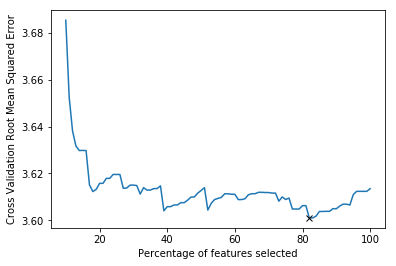

Optimal Percent: 82
Optimal Number of Features: 82
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male' 'RIDRETH1_Mexican_American'
 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Non_Hispanic_White'
 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic' 'DMDEDUC2_9th_to_12th_No_Grad'
 'DMDEDUC2_College_Grad_And_Above' 'DMDEDUC2_High_School_Grad_GED'
 'DMDEDUC2_Less_Than_9th' 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced'
 'DMDMARTL_Living_W_Partner' 'DMDMARTL_Married' 'DMDMARTL_Never_Married'
 'DMDMARTL_Widowed' 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_25000_to_34999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_5000_to_9999'
 'INDHHIN2_55000_to_64999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_Yes' 'HEQ010_No' 'HEQ010_Yes' 'HUQ051_0' 'HUQ051_1'
 'HUQ0

In [170]:
cv = 10
lin_reg = LinearRegression(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

print 'Percentage List Used:'
print percentages
print '\n'

# Find the optimal list of features to use
opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_reg_percent(data_reg_train_np, target_reg_train_np, lin_reg, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print reg_spdsht_features[chosen_attr]
print '\n'

train_fs_df, lin_all_info_df, lin_fs_info_df = optimize_reg_features(data_reg_train_np, target_reg_train_np, lin_reg, reg_spdsht_features, chosen_attr, chosen_w, chosen_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_reg_test_np, columns = reg_spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)

# Perform grid search with parameter dictionary passed in
lin_model, lin_model_coefs = model_reg_data(lin_reg, train_arr_fs, target_reg_train_np, test_arr_fs, target_reg_test_np, cv)

# add model coef values into the feature selection info dataframe (with the feature selection weights and p values)
lin_fs_info_df["coeffs"] = lin_model_coefs



Save the feature selection info with weights, p values, and coefs to a csv file.

In [171]:
lin_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\LinReg Feature Info.csv')

# Linear Regression On Normalized Training

Call the find percent and optimize feature functions to perform feature selection on the normalized 80% split training data. Create new training and testing dataframes and numpy arrays that contain only the features from feature selection. Call the model data function with these new training and testing arrays.I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best RMSE and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


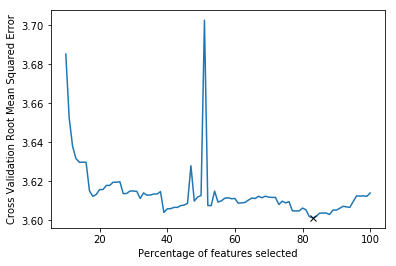

Optimal Percent: 83
Optimal Number of Features: 83
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male' 'RIDRETH1_Mexican_American'
 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Non_Hispanic_White'
 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic' 'DMDEDUC2_9th_to_12th_No_Grad'
 'DMDEDUC2_College_Grad_And_Above' 'DMDEDUC2_High_School_Grad_GED'
 'DMDEDUC2_Less_Than_9th' 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced'
 'DMDMARTL_Living_W_Partner' 'DMDMARTL_Married' 'DMDMARTL_Never_Married'
 'DMDMARTL_Widowed' 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_25000_to_34999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_5000_to_9999'
 'INDHHIN2_55000_to_64999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_No' 'SMQ020_Yes' 'HEQ010_No' 'HEQ010_Yes' 'HUQ051_0' 'HUQ0

In [172]:
cv = 10
lin_reg = LinearRegression(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

print 'Percentage List Used:'
print percentages
print '\n'

# Find the optimal list of features to use
opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_reg_percent(data_train_reg_norm_np, target_reg_train_np, lin_reg, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print reg_spdsht_features[chosen_attr]
print '\n'

train_fs_df, lin_norm_all_info_df, lin_norm_fs_info_df = optimize_reg_features(data_train_reg_norm_np, target_reg_train_np, lin_reg, reg_spdsht_features, chosen_attr, chosen_w, chosen_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_test_reg_norm_np, columns = reg_spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)

# Perform grid search with parameter dictionary passed in
lin_model, lin_norm_model_coefs = model_reg_data(lin_reg, train_arr_fs, target_reg_train_np, test_arr_fs, target_reg_test_np, cv)

lin_norm_fs_info_df["coeffs"] = lin_norm_model_coefs


Save the feature selection info with weights, p values, and coefs to a csv file.

In [173]:
lin_norm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\LinReg Norm Feature Info.csv')

# Ridge Regression On Original Training

Call the create_opt_reg_model function with the percentage list for feature selection and model parameters and their ranges for grid search model selection with the 80% split training data (not normalized). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage and parameter values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best RMSE and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


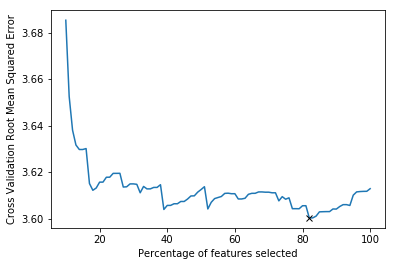

Optimal Percent: 82
Optimal Number of Features: 82
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male' 'RIDRETH1_Mexican_American'
 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Non_Hispanic_White'
 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic' 'DMDEDUC2_9th_to_12th_No_Grad'
 'DMDEDUC2_College_Grad_And_Above' 'DMDEDUC2_High_School_Grad_GED'
 'DMDEDUC2_Less_Than_9th' 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced'
 'DMDMARTL_Living_W_Partner' 'DMDMARTL_Married' 'DMDMARTL_Never_Married'
 'DMDMARTL_Widowed' 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_25000_to_34999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_5000_to_9999'
 'INDHHIN2_55000_to_64999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_Yes' 'HEQ010_No' 'HEQ010_Yes' 'HUQ051_0' 'HUQ051_1'
 'HUQ0

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   51.1s finished


In [174]:
cv = 10
ridge_reg = Ridge(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

rid_model, rid_all_info_df, rid_fs_info_df, rid_features = create_opt_reg_model(ridge_reg, data_reg_train_np, target_reg_train_np, data_reg_test_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


Save the feature selection info with weights, p values, and coefs to a csv file.

In [175]:
rid_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Ridge Feature Info.csv')

# Ridge Regression On Normalized Training

Call the create_opt_reg_model function with the percentage list for feature selection and model parameters and their ranges for grid search model selection with the normalized 80% split training data. I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage and parameter values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best RMSE and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


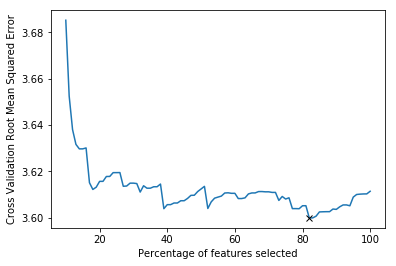

Optimal Percent: 82
Optimal Number of Features: 82
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male' 'RIDRETH1_Mexican_American'
 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Non_Hispanic_White'
 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic' 'DMDEDUC2_9th_to_12th_No_Grad'
 'DMDEDUC2_College_Grad_And_Above' 'DMDEDUC2_High_School_Grad_GED'
 'DMDEDUC2_Less_Than_9th' 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced'
 'DMDMARTL_Living_W_Partner' 'DMDMARTL_Married' 'DMDMARTL_Never_Married'
 'DMDMARTL_Widowed' 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_25000_to_34999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_5000_to_9999'
 'INDHHIN2_55000_to_64999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_Yes' 'HEQ010_No' 'HEQ010_Yes' 'HUQ051_0' 'HUQ051_1'
 'HUQ0

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   51.6s finished


In [176]:
cv = 10
ridge_reg = Ridge(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

rid_model, rid_norm_all_info_df, rid_norm_fs_info_df, rid_features = create_opt_reg_model(ridge_reg, data_train_reg_norm_np, target_reg_train_np, data_test_reg_norm_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


Save the feature selection info with weights, p values, and coefs to a csv file.

In [177]:
rid_norm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Ridge Norm Feature Info.csv')

# Lasso Regression On Original Training

Call the create_opt_reg_model function with the percentage list for feature selection and model parameters and their ranges for grid search model selection with the 80% split training data (not normalized). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage and parameter values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best RMSE and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


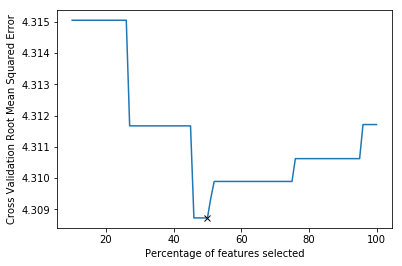

Optimal Percent: 50
Optimal Number of Features: 50
Features Chosen:
['INDFMPIR' 'CBD120' 'DBD900' 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Other'
 'DMDEDUC2_College_Grad_And_Above' 'DMDEDUC2_High_School_Grad_GED'
 'DMDEDUC2_Some_College_AA' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_55000_to_64999' 'BPQ020_No' 'BPQ020_Yes' 'DIQ010_Borderline'
 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No' 'MCQ080_Yes' 'MCQ365A_No'
 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes' 'HUQ051_0' 'HUQ051_1'
 'HUQ051_16_Or_More' 'HUQ051_2_to_3' 'HUQ051_4_to_5' 'HUQ071_No'
 'HUQ071_Yes' 'MCQ010_No' 'MCQ010_Yes' 'MCQ160N_No' 'MCQ160N_Yes'
 'MCQ160B_No' 'MCQ160B_Yes' 'MCQ160D_No' 'MCQ160D_Yes' 'MCQ160E_No'
 'MCQ160E_Yes' 'MCQ160M_No' 'MCQ160M_Yes' 'MCQ160K_No' 'MCQ160K_Yes'
 'MCQ160O_No' 'MCQ160O_Yes']


Feature Optimization (Removal of All Attributes with P Values >= 0.05)
--------------------------------------

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   53.8s finished


In [178]:
cv = 10
lasso_reg = Lasso(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

las_model, las_all_info_df, las_fs_info_df, las_features = create_opt_reg_model(lasso_reg, data_reg_train_np, target_reg_train_np, data_reg_test_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


Save the feature selection info with weights, p values, and coefs to a csv file.

In [179]:
las_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Lasso Feature Info.csv')

# Lasso Regression On Normalized Training

Call the create_opt_reg_model function with the percentage list for feature selection and model parameters and their ranges for grid search model selection with the normalized 80% split training data. I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage and parameter values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best RMSE and model complexity trade-off, is not overfit).

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


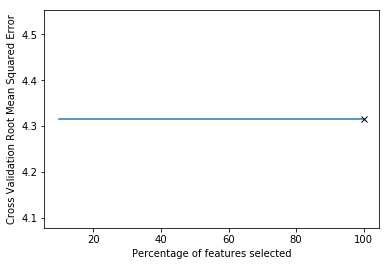

Optimal Percent: 100
Optimal Number of Features: 101
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD895'
 'DBD900' 'DBD905' 'DBD910' 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Separated'
 'DMDMARTL_Widowed' 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_10000_to_14999' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_20000_to_24999' 'INDHHIN2_25000_to_34999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_45000_to_54999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DI

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   53.3s finished


In [180]:
cv = 10
lasso_reg = Lasso(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

las_model, las_norm_all_info_df, las_norm_fs_info_df, las_features = create_opt_reg_model(lasso_reg, data_train_reg_norm_np, target_reg_train_np, data_test_reg_norm_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


Save the feature selection info with weights, p values, and coefs to a csv file.

In [181]:
las_norm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Lasso Norm Feature Info.csv')

# ----------------------------- Classification Revisited -----------------------------------------------

# ----------------------- Classification With Class Weights --------------------------------------

# Decision Tree Classification With Feature Selection and Balanced Weighting

Call the create_opt_model function with the percentage list for feature selection and model parameters and their ranges for grid search model selection. I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

The percentage and parameter values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

In [182]:
spdsht_features = np.array(data_train.columns.values.tolist())
print spdsht_features.shape

spdsht_features_df = pd.DataFrame(spdsht_features)


(101L,)


Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


Parameters Used:
{'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'criterion': ['entropy', 'gini'], 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]), 'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])}


---------------------------------- Feature Selection ----------------------------------


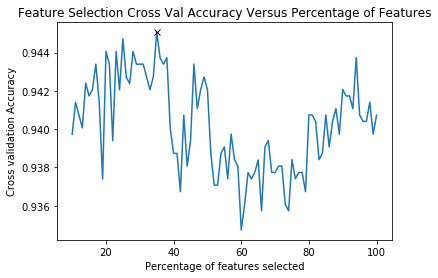

Optimal Percent: 35
Optimal Number of Features: 35
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD900'
 'DBD905' 'DBD910' 'PAD680' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_College_Grad_And_Above' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_5000_to_9999' 'BPQ020_No' 'BPQ020_Yes' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'HUQ051_1' 'HUQ051_16_Or_More' 'HUQ071_Yes' 'MCQ010_No' 'MCQ010_Yes'
 'MCQ160B_Yes' 'MCQ160M_Yes' 'MCQ160O_Yes']


Feature Optimization (Removal of All Attributes with P Values >= 0.05)
----------------------------------------------------------------------
Final Number of Training Set Attributes: 35
Final Training Set Features Selection Accuracy: 0
Final Training Set Attributes:
['RIDAGEYR', 'INDFMPIR', 'CBD070', 'CBD090', 'CBD120', 'CBD130', 'DBD900', 'DBD905', 'DBD910', 'PAD680', 'RIAGENDR_Female', 'RIAGENDR_Male', 

[Parallel(n_jobs=1)]: Done 64000 out of 64000 | elapsed:  6.7min finished


In [183]:
cv = 10
dt = tree.DecisionTreeClassifier(class_weight  = "balanced")
percentages = a = np.arange(10, 101, 1)

temp_leaf = np.arange(10, 201, 10)
temp_depth = np.arange(1, 9, 1)

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': temp_depth,
    'min_samples_leaf': temp_leaf,
    'min_samples_split': temp_leaf
}

print 'Percentage List Used:'
print percentages
print '\n'
print 'Parameters Used:'
print parameters
print '\n'

dt_model, dt_all_info_df, dt_fs_info_df, dt_features = create_opt_model(dt, data_train_np, target_train_np, data_test_np, target_test_np, percentages, parameters, cv, spdsht_features)


Compute the number of nodes present in the tree.

In [184]:
treeObj = dt_model.tree_
print 'Number of nodes in the tree:'
print treeObj.node_count

Number of nodes in the tree:
65


Save the chosen features and all features with their weights and p values to csv files.

In [185]:
dt_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Balanced Chosen Features.csv')

In [186]:
dt_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Balanced All Features.csv')

Retreive and save the feature importances of the final model to a csv file.

In [187]:
feature_imp = dt_model.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = dt_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Balanced Feature Selection Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_College_Grad_And_Above,INDHHIN2_15000_to_19999,INDHHIN2_5000_to_9999,BPQ020_No,BPQ020_Yes,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,HUQ051_1,HUQ051_16_Or_More,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ160B_Yes,MCQ160M_Yes,MCQ160O_Yes
0,0.105049,0.101082,0.030072,0.0,0.013356,0.014404,0.028229,0.0,0.018495,0.011018,0.014838,0.005768,0.0,0.0,0.015426,0.0,0.0,0.0,0.0,0.0,0.0,0.543294,0.0,0.0,0.061143,0.0,0.0,0.037826,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualize the final tree.

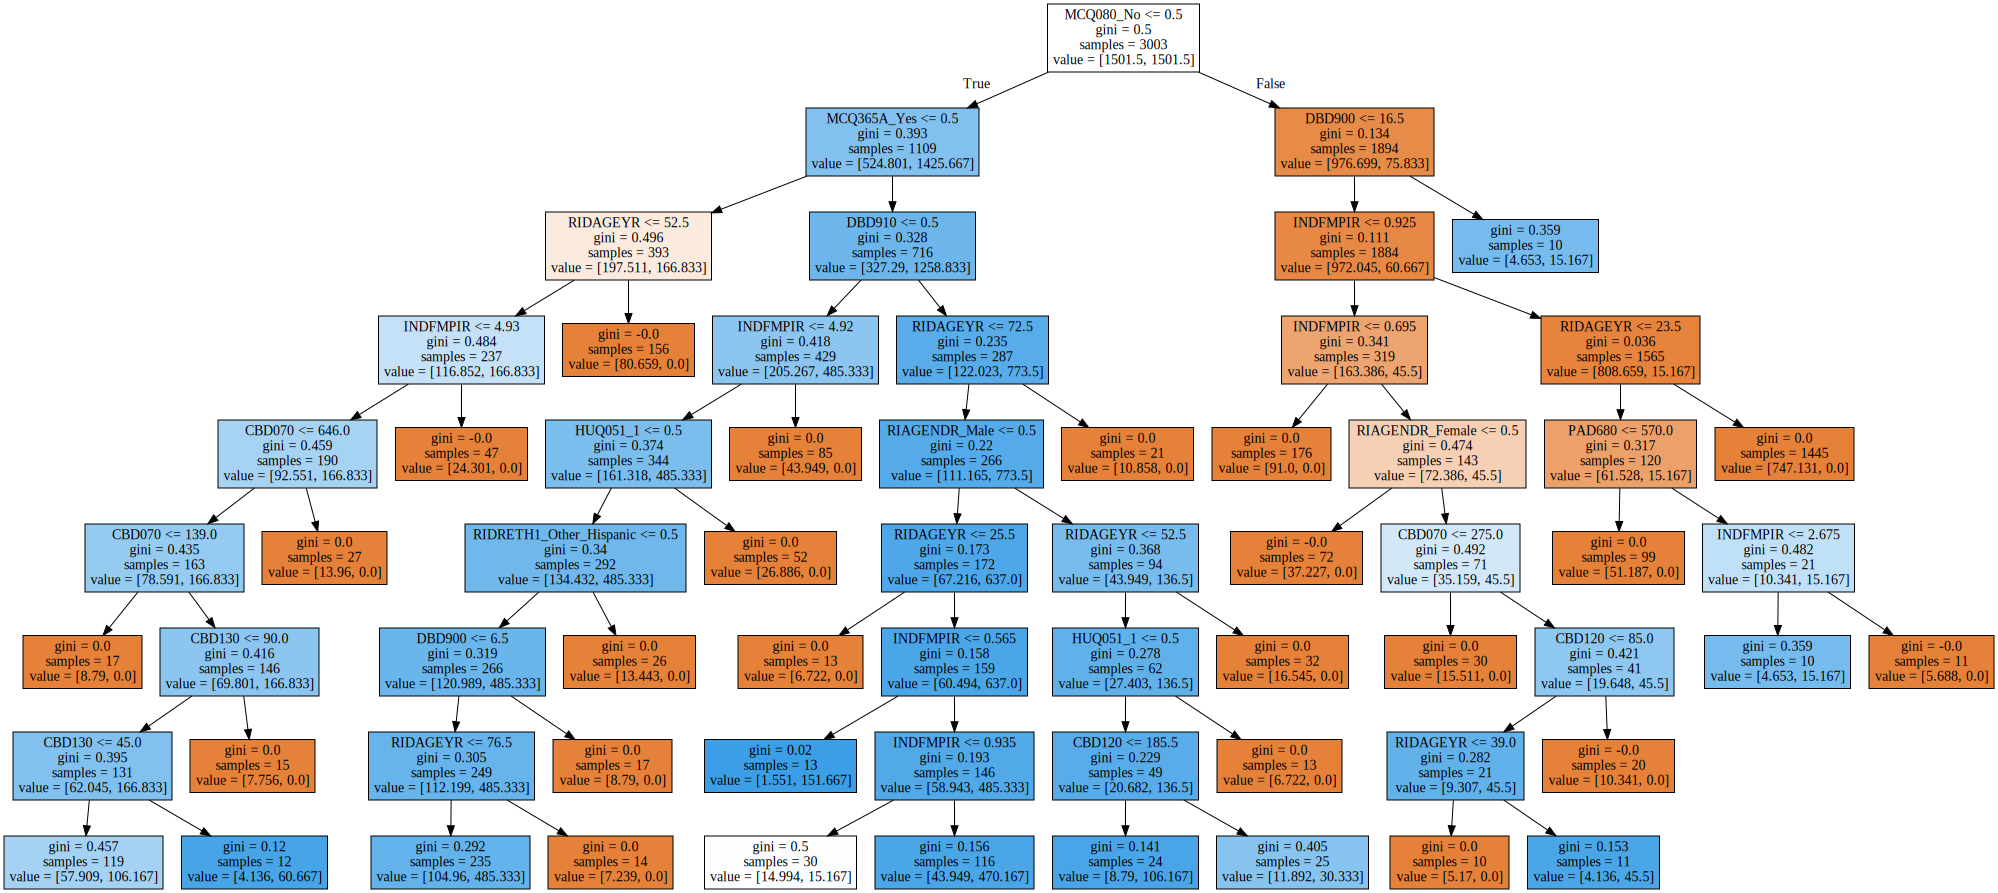

In [188]:
export_graphviz(dt_model, out_file='tree_balanced.dot', feature_names=dt_features, filled=True)

with open("tree_balanced.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Save the final tree visualization to a jpeg file.

In [189]:
system(dot -Tpng tree_balanced.dot -o tree_balanced.jpeg)

[]

# Decision Tree Classification With All Features and Balanced Weighting

Call the grid search and model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting). The parameter values that are used below are the result of several modelling attempts with different value ranges. The values below resulted in the best model (has the best accuracy and model complexity trade-off, is not overfit).

In [190]:
cv = 10
dt_all = tree.DecisionTreeClassifier(class_weight  = "balanced")

temp_leaf = np.arange(10, 201, 10)
temp_depth = np.arange(1, 9, 1)

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': temp_depth,
    'min_samples_leaf': temp_leaf,
    'min_samples_split': temp_leaf
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(dt_all, data_train_np, target_train_np, data_test_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
dt_model_all = model_data(opt_model, data_train_np, target_train_np, data_test_np, target_test_np, cv)


Parameters Used:
{'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'criterion': ['entropy', 'gini'], 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]), 'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 6400 candidates, totalling 64000 fits


[Parallel(n_jobs=1)]: Done 64000 out of 64000 | elapsed: 13.1min finished


Wall time: 13min 8s


Grid Search Optimal Parameters: {'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10}
Grid Search Optimal Parameter Score: 0.815517815518


Final Model Parameter Settings:
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.846079869038
10 Fold Cross Validation Testing Accuracy:
0.820181616833


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.84015984016

Compute the number of nodes present in the tree.

In [191]:
treeObjAll = dt_model_all.tree_
print 'Number of nodes in the tree:'
print treeObjAll.node_count

Number of nodes in the tree:
61


Retreive and save the feature importances of the final model to a csv file.

In [192]:
feature_imp = dt_model_all.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = spdsht_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Balanced Full Training Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.089791,0.088329,0.027227,0.0,0.0,0.0,0.036422,0.017811,0.0,0.01854,0.0,0.014874,0.005411,0.0,0.0,0.0,0.0,0.015464,0.008851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012999,0.0,0.0,0.0,0.0,0.012911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544626,0.0,0.0,0.061293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008031,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualize the final tree.

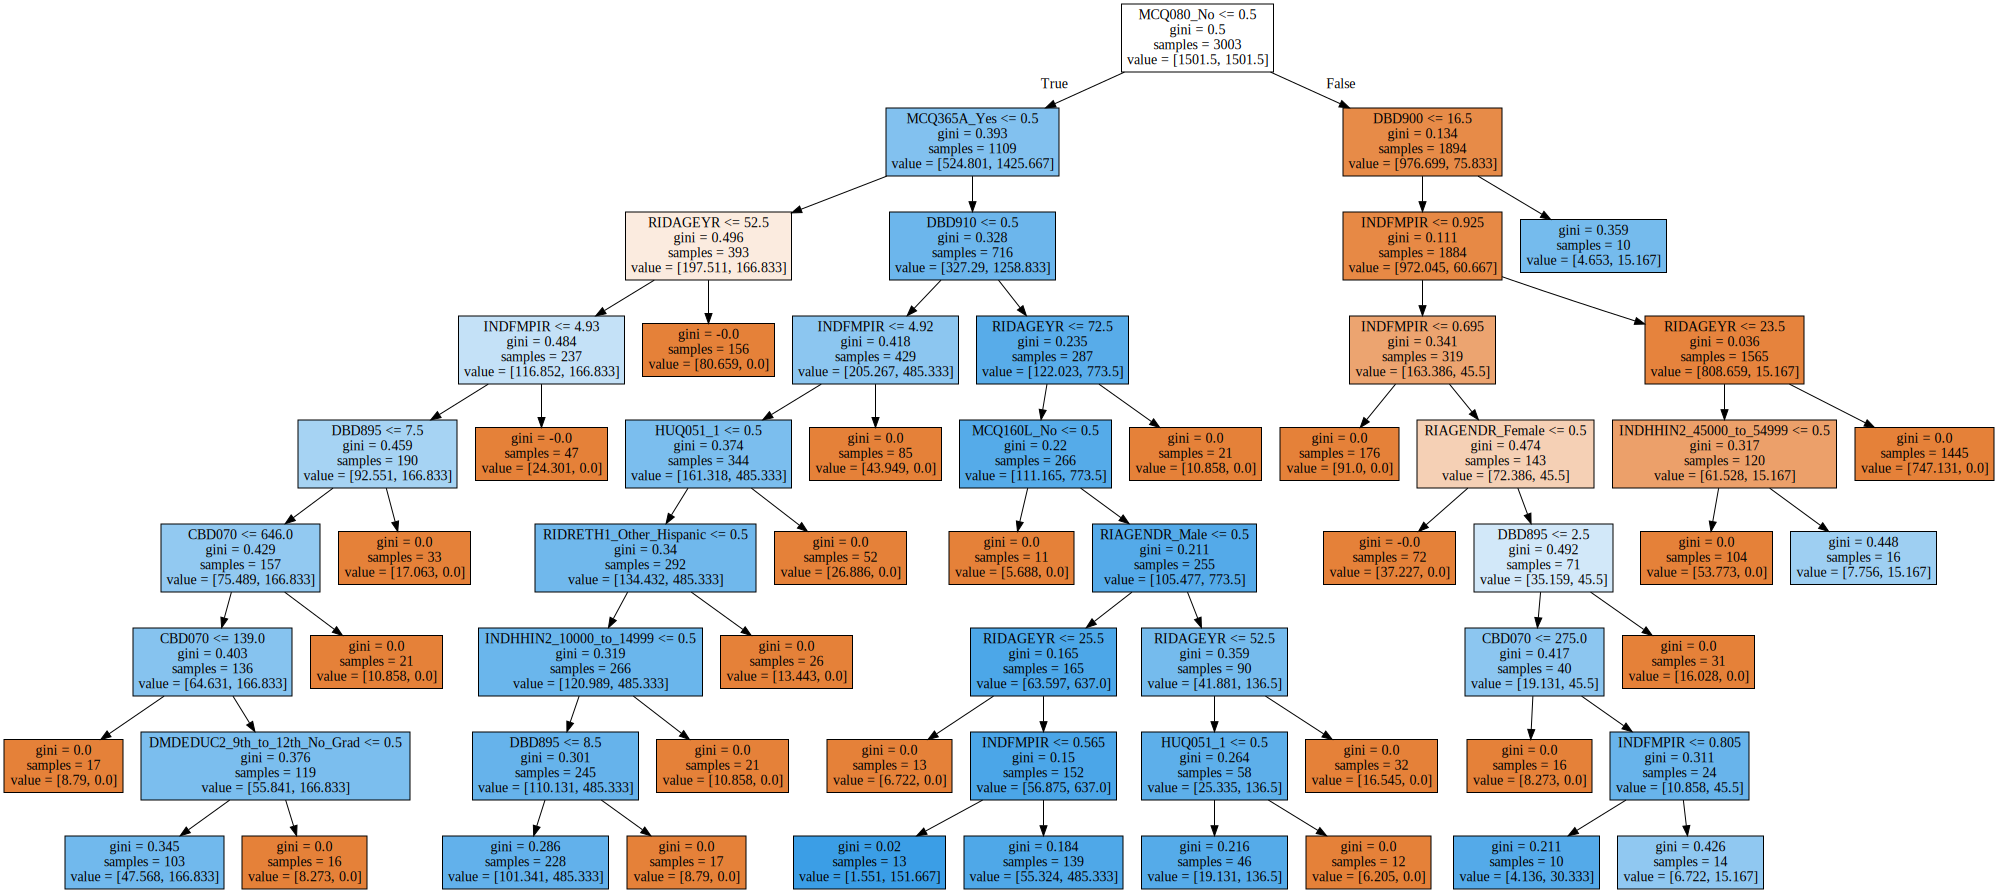

In [193]:
export_graphviz(dt_model_all, out_file='tree_all_balanced.dot', feature_names=spdsht_features, filled=True)

with open("tree_all_balanced.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Save the final tree visualization to a jpeg file.

In [194]:
system(dot -Tpng tree_all_balanced.dot -o tree_all_balanced.jpeg)

[]

# ------------------------------- Ensemble Classification --------------------------------------------

# Random Forest Classification

Call the grid search and model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

Note that this model was run with all of the features (no feature selection) because the ensemble method will randomly choose subsets of features at each node.  Since there was not a large difference in performance between feature selection and none with decision trees above, I opted for sending in all the features and allowing the algorithm to choose which to use.

I originally ran this model with max_depth, min_samples_leaf and min_samples_split specified similarly to the rest of the decision tree models, but the code took an extremely long time to run (had to kill it while it was still running over 20 hrs. because my laptop was having issues).  I then opted for just leaving the criterion option and the n_estimators option.  I removed the max depth because of the explanation of how the random forest algorithm already tends toward modelling several short trees.

In [195]:
cv = 10
rf_all = RandomForestClassifier(class_weight  = "balanced")

temp_n_estimators = np.arange(5, 101, 5)

parameters = {
    'criterion': ['entropy','gini'],
    'n_estimators': temp_n_estimators
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(rf_all, data_train_np, target_train_np, data_test_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
rf_model_all = model_data(opt_model, data_train_np, target_train_np, data_test_np, target_test_np, cv)

Parameters Used:
{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]), 'criterion': ['entropy', 'gini']}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.3min finished


Wall time: 1min 17s


Grid Search Optimal Parameters: {'n_estimators': 20, 'criterion': 'gini'}
Grid Search Optimal Parameter Score: 0.968031968032


Final Model Parameter Settings:
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.997151121667
10 Fold Cross Validation Testing Accuracy:
0.966696566999


Final Model Full Training Set Results
----------------------------------

C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Retrieve and save the feature importances to a csv file.

In [196]:
feature_imp = rf_model_all.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = spdsht_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\RF Balanced Full Training Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.043795,0.053493,0.031891,0.015559,0.030237,0.028535,0.02247,0.024459,0.015684,0.030845,0.033186,0.012401,0.016707,0.003426,0.006596,0.006126,0.004152,0.004984,0.006318,0.009638,0.005649,0.00116,0.00489,0.00255,0.003164,0.004374,0.004304,0.000739,0.00188,0.000214,0.004818,0.006267,0.003061,0.001479,0.005781,0.003008,0.002963,0.001867,0.004504,0.002014,0.0025,0.007357,0.005217,0.00167,0.002672,0.003191,0.099971,0.099242,0.064387,0.027257,0.047834,0.025094,0.009778,0.014286,0.000186,0.0,0.00013,0.000004,0.006617,0.010313,0.00308,0.001818,0.007742,0.007638,0.002175,0.005079,0.000702,0.002129,0.00176,0.015944,0.005467,0.0,0.0,0.00051,0.003134,0.002556,0.001462,0.001515,0.000476,0.000861,0.001411,0.000513,0.001871,0.001034,0.001829,0.001904,0.000766,0.001457,0.000153,0.00213,0.003014,0.001073,0.003644,0.00625,0.004208,0.000312,0.002373,0.003361,0.00151,0.001762,0.002481


# Adaboost Decision Tree Classification Without Balanced Weights

Call the grid search and model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

Note that this model was run with all of the features (no feature selection) because the ensemble method will randomly choose subsets of features at each node.  Since there was not a large difference in performance between feature selection and none with decision trees above, I opted for sending in all the features and allowing the algorithm to choose which to use.

There was no easy way to have the grid search algorithm change the decision tree parameters because they are imbedded within the model passed into the adaboost model (grid search will only change the adaboost model parameters).

In [197]:
cv = 10
ab_all = AdaBoostClassifier(DecisionTreeClassifier())

temp_n_estimators = np.arange(5, 101, 5)

parameters = {
    'n_estimators': temp_n_estimators
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(ab_all, data_train_np, target_train_np, data_test_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
ab_model_all = model_data(opt_model, data_train_np, target_train_np, data_test_np, target_test_np, cv)

Parameters Used:
{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.4s finished


Wall time: 5.56 s


Grid Search Optimal Parameters: {'n_estimators': 95}
Grid Search Optimal Parameter Score: 0.942390942391


Final Model Parameter Settings:
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=95, random_state=None)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
1.0
10 Fold Cross Validation Testing Accuracy:
0.936058693245


Final Model Full Training Set Results
--------------

Retrieve and save the feature importances to a csv file.

In [198]:
feature_imp = ab_model_all.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = spdsht_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\AB DT Full Training Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.056895,0.063975,0.086657,0.040262,0.077533,0.014295,0.03908,0.048147,0.046395,0.032698,0.058175,0.006964,0.015826,0.015483,0.021239,0.0,0.011873,0.0,0.0,0.008356,0.005642,0.0,0.023382,0.0,0.0,0.006964,0.0,0.008953,0.0,0.0,0.016248,0.0,0.009653,0.0,0.013394,0.006655,0.009278,0.00864,0.0,0.009739,0.007834,0.0,0.0,0.0,0.013115,0.0,0.0,0.001813,0.053406,0.0,0.007051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016794,0.0,0.0,0.004974,0.020032,0.0,0.007521,0.009207,0.0,0.0,0.0,0.009496,0.009749,0.0,0.0,0.001695,0.0,0.0,0.008355,0.0,0.012438,0.001285,0.0,0.0,0.0,0.0,0.0,0.005829,0.0,0.0,0.0,0.005223,0.0,0.001578,0.0,0.007834,0.000234,0.023184,0.0,0.0,0.0,0.008953,0.0


# Adaboost Decision Tree Classification With Balanced Weights

Call the grid search and model data functions with the full training set (with no feature selection performed). I chose to use a cross validation fold number of 10 because the training set has 3,003 instances (which is enough to support 10 fold splitting).

Note that this model was run with all of the features (no feature selection) because the ensemble method will randomly choose subsets of features at each node.  Since there was not a large difference in performance between feature selection and none with decision trees above, I opted for sending in all the features and allowing the algorithm to choose which to use.

There was no easy way to have the grid search algorithm change the decision tree parameters because they are imbedded within the model passed into the adaboost model (grid search will only change the adaboost model parameters).

In [199]:
cv = 10
ab_all = AdaBoostClassifier(DecisionTreeClassifier(class_weight  = "balanced"))

temp_n_estimators = np.arange(5, 101, 5)

parameters = {
    'n_estimators': temp_n_estimators
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(ab_all, data_train_np, target_train_np, data_test_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
ab_model_all = model_data(opt_model, data_train_np, target_train_np, data_test_np, target_test_np, cv)

Parameters Used:
{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.6s finished


Wall time: 5.74 s


Grid Search Optimal Parameters: {'n_estimators': 40}
Grid Search Optimal Parameter Score: 0.942723942724


Final Model Parameter Settings:
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=40, random_state=None)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
1.0
10 Fold Cross Validation Testing Accuracy:
0.939057585825


Final Model Full Training Set Results
--------

Retrieve and save the feature importances to a csv file.

In [200]:
feature_imp = ab_model_all.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = spdsht_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\AB DT Balanced Full Training Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.088829,0.094439,0.024067,0.003315,0.005687,0.033323,0.029648,0.021162,0.008489,0.017526,0.009787,0.004605,0.0,0.00011,0.003738,0.0,0.014496,0.017862,0.007891,0.0,0.0,0.0,0.003258,0.005731,0.002206,0.0,0.0084,0.002365,0.000019,0.000666,0.0,0.009436,0.004712,0.00715,0.0,0.0,0.012023,0.0,0.004311,0.006811,0.005014,0.0,0.0,0.000655,0.001166,0.0,0.0,0.395317,0.0,0.046914,0.0,0.0,0.000794,0.0,0.0,0.0,0.0,0.0,0.001296,0.027893,0.004583,0.001843,0.00179,0.001412,0.002291,0.0,0.001783,0.003822,0.000666,0.004176,0.0,0.0,0.0,0.0,0.000656,0.0,0.0,0.001985,0.0,0.0,0.0,0.0,0.0,0.0,0.002913,0.0,0.001698,0.0,0.0,0.0,0.006169,0.002615,0.002671,0.001099,0.005829,0.00131,0.0,0.010987,0.004368,0.001313,0.002908
